# Analysis of stock returns forecasts

**Reference**: Realized GARCH models: Simpler is better (Xie & Yu, 2019)

Sample: Mexico (^MXX)

In [122]:
# Memory clearing
rm(list=ls())

## 1. Data import

In [123]:
# Packages
install.packages('quantmod')
install.packages('tidyquant')
install.packages('PerformanceAnalytics')

library(quantmod)
library(tidyquant)
library(PerformanceAnalytics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Reading the datas (Source: Yahoo Finance)**

In [124]:
getSymbols("^MXX", from = '2000-01-01', to = '2021-10-31') 

Warning message:
“^MXX contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "^MXX"

**Checking data frequency**

In [125]:
periodicity(MXX)        

Daily periodicity from 2000-01-03 to 2021-10-29 

**Identifying missing values (%)**

In [126]:
round(prop.table(table(is.na(MXX)))*100, digits = 2)       


FALSE  TRUE 
 98.7   1.3 

**Removing missing values**

In [127]:
MXX <- na.omit(MXX)    
round(prop.table(table(is.na(MXX)))*100, digits = 2)         


FALSE 
  100 

**Removing unnecessary features**

In [128]:
MXX.df <- MXX[,'MXX.Close']                              
head(MXX.df)

           MXX.Close
2000-01-03   7077.71
2000-01-04   6675.27
2000-01-05   6764.31
2000-01-06   6751.65
2000-01-07   7047.09
2000-01-10   7333.70

**Calculating log-returns**

In [129]:
logreturn <- diff(log(MXX.df$MXX.Close))*100                     
head(logreturn)

            MXX.Close
2000-01-03         NA
2000-01-04 -5.8540748
2000-01-05  1.3250614
2000-01-06 -0.1873365
2000-01-07  4.2827839
2000-01-10  3.9865447

**Aggregating the data**

In [130]:
MXX.df$MXX.Return <- logreturn                  
MXX.df <- na.omit(MXX.df)
head(MXX.df)

           MXX.Close MXX.Return
2000-01-04   6675.27 -5.8540748
2000-01-05   6764.31  1.3250614
2000-01-06   6751.65 -0.1873365
2000-01-07   7047.09  4.2827839
2000-01-10   7333.70  3.9865447
2000-01-11   7143.13 -2.6329151

**Identifying missing values (%)**

In [131]:
round(prop.table(table(is.na(MXX.df)))*100, digits = 2)       


FALSE 
  100 

## 2. Graph analysis

In [132]:
# Package
install.packages('xts')
install.packages('ggplot2')
install.packages('gridExtra')

library(xts)
library(ggplot2)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Price & Return charts**

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.



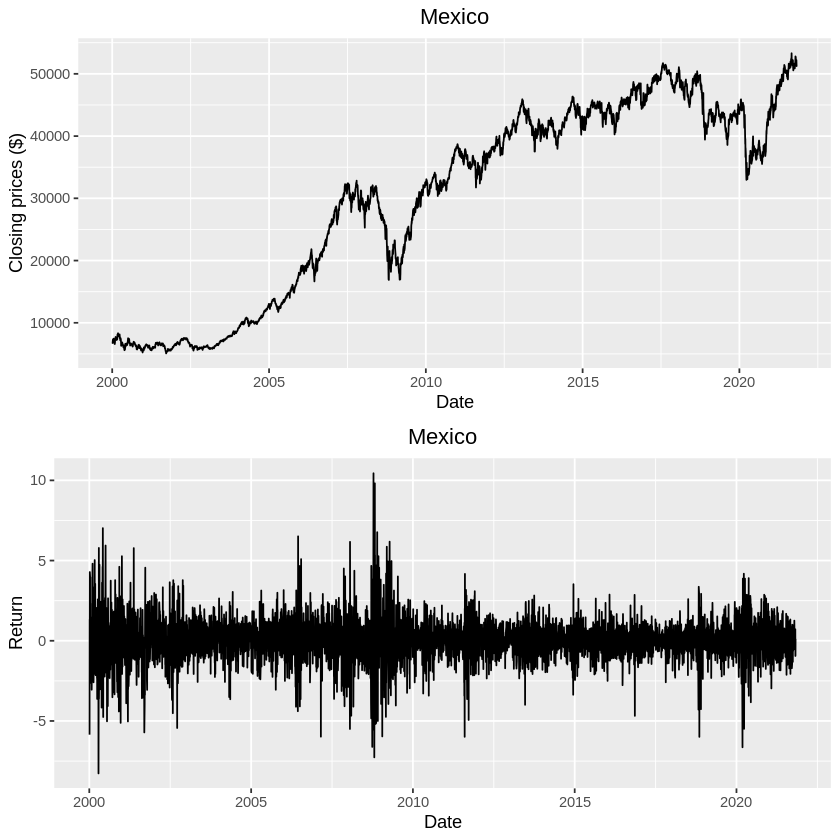

In [133]:
# Price chart
graph1 <- ggplot(MXX.df,
                aes(x = index(MXX.df), y = MXX.df[,'MXX.Close'])) +
                geom_line(color = "black") +
                ggtitle("Mexico") +
                xlab("Date") +
                ylab("Closing prices ($)") +
                theme(plot.title = element_text(hjust = 0.5))

# Return chart
graph2 <- ggplot(MXX.df,
                aes(x = index(MXX.df), y = MXX.df[,'MXX.Return'])) +
                geom_line(color = "black") +
                ggtitle("Mexico") +
                xlab("Date") +
                ylab("Return") +
                theme(plot.title = element_text(hjust = 0.5))

grid.arrange(graph1, graph2, ncol = 1, nrow = 2)

## 3. Descriptive statistic

In [134]:
# Packages
install.packages('moments')

library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Descriptive statistic**

In [135]:
# mean
round(mean(MXX.df$MXX.Return), 3)                         

[1] 0.036

In [136]:
# sd
round(sd(MXX.df$MXX.Return), 3)                           

[1] 1.27

In [137]:
# skewness
round(skewness(MXX.df$MXX.Return), 3)                     

[1] -0.052

In [138]:
# kurtosis
round(kurtosis(MXX.df$MXX.Return), 3)                     

[1] 5.229

In [139]:
# min
round(min(MXX.df$MXX.Return), 3)                          

[1] -8.267

In [140]:
# p5
round(quantile(MXX.df$MXX.Return, probs = 0.05), 3)       

5% 
-1.98

In [141]:
# p25
round(quantile(MXX.df$MXX.Return, probs = 0.25), 3)       

25% 
-0.578

In [142]:
# median
round(median(MXX.df$MXX.Return), 3)                       

[1] 0.058

In [143]:
# p75
round(quantile(MXX.df$MXX.Return, probs = 0.75), 3)       

75% 
0.682

In [144]:
# p95
round(quantile(MXX.df$MXX.Return, probs = 0.95), 3)       

95% 
1.925

In [145]:
# max
round(max(MXX.df$MXX.Return), 3)                          

[1] 10.441

In [146]:
# n observations
length(MXX.df$MXX.Return)                                 

[1] 5477

## 4. Series normality analysis

In [147]:
# Package
library(tseries)

In [148]:
jarque.bera.test(MXX.df$MXX.Return)


	Jarque Bera Test

data:  MXX.df$MXX.Return
X-squared = 6241.1, df = 2, p-value < 2.2e-16


## 5. Autocorrelation pattern analysis

In [149]:
# Packages
install.packages('TSA')
install.packages('aTSA')
install.packages('FinTS')

library(TSA)
library(aTSA)
library(FinTS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**McLeod-Li test for conditional heteroskedasticity (ARCH effect)**

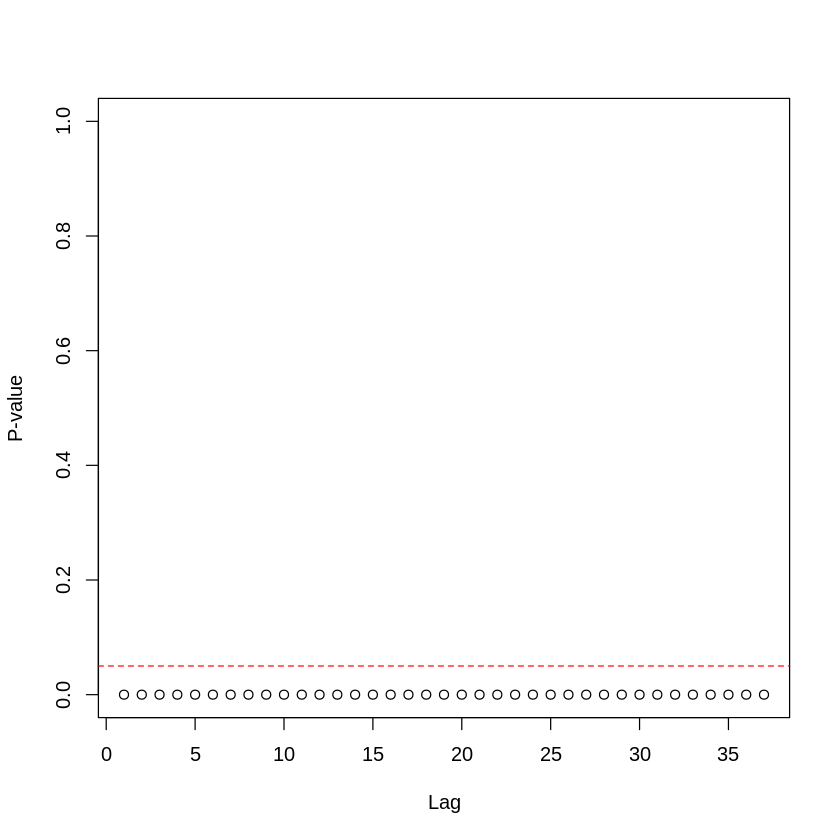

In [150]:
McLeod.Li.test(y = MXX.df$MXX.Return)
# p-valor < 1% => ARCH effect

**Lagrange Multiplier (LM) test for autoregressive conditional heteroscedasticity (ARCH)**

In [151]:
ArchTest(MXX.df$MXX.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  MXX.df$MXX.Return
Chi-squared = 913.25, df = 12, p-value < 2.2e-16


## 6. GARCH model estimation

In [152]:
# Packages
install.packages('tidyverse')
install.packages('FinTS')
install.packages('texreg')
install.packages('rugarch')

library(tidyverse)
library(FinTS)
library(texreg)
library(rugarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [153]:
# Parameters definition
ar_lag <- 0
ma_lag <- 0
arch_lag <- 1
garch_lag <- 1

**Linear GARCH model**

In [154]:
# Specification 
garch.spec <- ugarchspec(variance.model = list(model = "sGARCH",
                                               garchOrder = c(arch_lag, garch_lag)),
                         mean.model = list(armaOrder = c(ar_lag, ma_lag)),
                         distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [155]:
# Estimation
garch.fit <- ugarchfit(spec = garch.spec, data = MXX.df$MXX.Return)
round(garch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0448,0.0127,3.5193,4e-04
omega,0.0153,0.0032,4.8462,0e+00
alpha1,0.0837,0.0074,11.3601,0e+00
beta1,0.9073,0.0079,114.4733,0e+00
skew,0.8958,0.0151,59.5202,0e+00


In [156]:
# Extracting variance series from the Linear GARCH model
var.garch <- ts(garch.fit@fit$sigma^2)
head(var.garch)

MXX.df$MXX.VolGARCH <- as.numeric(var.garch)
head(MXX.df)

A Time Series:
[1] 1.611746 4.388620 4.134352 3.771037 4.939378 5.796736

           MXX.Close MXX.Return MXX.VolGARCH
2000-01-04   6675.27 -5.8540748     1.611746
2000-01-05   6764.31  1.3250614     4.388620
2000-01-06   6751.65 -0.1873365     4.134352
2000-01-07   7047.09  4.2827839     3.771037
2000-01-10   7333.70  3.9865447     4.939378
2000-01-11   7143.13 -2.6329151     5.796736

**EGARCH model**

In [157]:
# Specification 
egarch.spec <- ugarchspec(variance.model = list(model = "eGARCH",
                                                garchOrder = c(arch_lag, garch_lag)),
                          mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                          distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [158]:
# Estimation
egarch.fit <- ugarchfit(spec = egarch.spec, data = MXX.df$MXX.Return)
round(egarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0150,0.0125,1.1994,0.2304
omega,0.0077,0.0018,4.1983,0.0000
alpha1,-0.0788,0.0068,-11.6626,0.0000
beta1,0.9848,0.0008,1244.4706,0.0000
gamma1,0.1497,0.0110,13.6207,0.0000
skew,0.8995,0.0153,58.8283,0.0000


In [159]:
# Extracting variance series from the EGARCH model
var.egarch <- ts(egarch.fit@fit$sigma^2)
head(var.egarch)

MXX.df$MXX.VolEGARCH <- as.numeric(var.egarch)
head(MXX.df)

A Time Series:
[1] 1.612120 4.115538 3.770774 3.384322 3.501847 3.571218

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH
2000-01-04   6675.27 -5.8540748     1.611746      1.612120
2000-01-05   6764.31  1.3250614     4.388620      4.115538
2000-01-06   6751.65 -0.1873365     4.134352      3.770774
2000-01-07   7047.09  4.2827839     3.771037      3.384322
2000-01-10   7333.70  3.9865447     4.939378      3.501847
2000-01-11   7143.13 -2.6329151     5.796736      3.571218

**GJR-GARCH model**

In [160]:
# Specification 
gjrgarch.spec <- ugarchspec(variance.model = list(model = "gjrGARCH",
                                                  garchOrder = c(arch_lag, garch_lag)),
                            mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                            distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [161]:
# Estimation
gjrgarch.fit <- ugarchfit(spec = gjrgarch.spec, data = MXX.df$MXX.Return)
round(gjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0227,0.0128,1.7734,0.0762
omega,0.0167,0.0032,5.2184,0.0000
alpha1,0.0235,0.0062,3.7558,0.0002
beta1,0.9159,0.0082,111.4854,0.0000
gamma1,0.0994,0.0114,8.7396,0.0000
skew,0.9009,0.0154,58.4730,0.0000


In [162]:
# Extracting variance series from the GJR-GARCH model
var.gjrgarch <- ts(gjrgarch.fit@fit$sigma^2)
head(var.gjrgarch)

MXX.df$MXX.VolGJRGARCH <- as.numeric(var.gjrgarch)
head(MXX.df)

A Time Series:
[1] 1.611854 5.737790 5.312071 4.887738 4.919663 4.891718

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-04   6675.27 -5.8540748     1.611746      1.612120        1.611854
2000-01-05   6764.31  1.3250614     4.388620      4.115538        5.737790
2000-01-06   6751.65 -0.1873365     4.134352      3.770774        5.312071
2000-01-07   7047.09  4.2827839     3.771037      3.384322        4.887738
2000-01-10   7333.70  3.9865447     4.939378      3.501847        4.919663
2000-01-11   7143.13 -2.6329151     5.796736      3.571218        4.891718

## 7. Realized GARCH model estimation

In [163]:
# Specification
realgarch.spec <- ugarchspec(mean.model = list(armaOrder = c(ar_lag, ma_lag),
                                               include.mean = FALSE),
                             variance.model = list(model = 'realGARCH',
                                                   garchOrder = c(arch_lag, garch_lag)),
                             distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution)

**Realized Linear GARCH**

In [164]:
# Estimation
realgarch.fit <- ugarchfit(realgarch.spec, MXX.df$MXX.Return,
                          solver = 'hybrid',
                          realizedVol = MXX.df$MXX.VolGARCH)
round(realgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0235,0.0193,1.2193,0.2227
alpha1,0.9777,0.0285,34.3025,0.0000
beta1,0.0000,0.0134,0.0000,1.0000
eta11,0.0035,0.0017,2.1432,0.0321
eta21,0.0060,0.0009,6.8421,0.0000
delta,1.0091,0.0260,38.7665,0.0000
lambda,0.1207,0.0012,104.6587,0.0000
skew,0.8906,0.0148,60.3323,0.0000
xi,-0.0220,0.0195,-1.1278,0.2594


In [165]:
# Extracting variance series from the Realized Linear GARCH model
var.realgarch <- ts(realgarch.fit@fit$sigma^2)
head(var.realgarch)

MXX.df$MXX.VolRealGARCH <- as.numeric(var.realgarch)
head(MXX.df)

A Time Series:
[1] 1.612980 1.632634 4.347453 4.101015 3.748298 4.880182

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-04   6675.27 -5.8540748     1.611746      1.612120        1.611854
2000-01-05   6764.31  1.3250614     4.388620      4.115538        5.737790
2000-01-06   6751.65 -0.1873365     4.134352      3.770774        5.312071
2000-01-07   7047.09  4.2827839     3.771037      3.384322        4.887738
2000-01-10   7333.70  3.9865447     4.939378      3.501847        4.919663
2000-01-11   7143.13 -2.6329151     5.796736      3.571218        4.891718
           MXX.VolRealGARCH
2000-01-04         1.612980
2000-01-05         1.632634
2000-01-06         4.347453
2000-01-07         4.101015
2000-01-10         3.748298
2000-01-11         4.880182

**Realized EGARCH**

In [166]:
# Estimation
realegarch.fit <- ugarchfit(realgarch.spec, MXX.df$MXX.Return,
                            solver = 'hybrid',
                            realizedVol = MXX.df$MXX.VolEGARCH)
round(realegarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0206,0.0192,1.0733,0.2831
alpha1,0.9911,0.0278,35.6812,0.0000
beta1,0.0000,0.0135,0.0000,1.0000
eta11,-0.0037,0.0018,-2.0626,0.0391
eta21,0.0067,0.0009,7.1309,0.0000
delta,0.9936,0.0242,41.0189,0.0000
lambda,0.1291,0.0012,104.5187,0.0000
skew,0.8862,0.0149,59.4844,0.0000
xi,-0.0185,0.0191,-0.9669,0.3336


In [167]:
# Extracting variance series from the Realized EGARCH model
var.realegarch <- ts(realegarch.fit@fit$sigma^2)
head(var.realegarch)

MXX.df$MXX.VolRealEGARCH <- as.numeric(var.realegarch)
head(MXX.df)

A Time Series:
[1] 1.612980 1.638666 4.148384 3.803844 3.417307 3.534897

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-04   6675.27 -5.8540748     1.611746      1.612120        1.611854
2000-01-05   6764.31  1.3250614     4.388620      4.115538        5.737790
2000-01-06   6751.65 -0.1873365     4.134352      3.770774        5.312071
2000-01-07   7047.09  4.2827839     3.771037      3.384322        4.887738
2000-01-10   7333.70  3.9865447     4.939378      3.501847        4.919663
2000-01-11   7143.13 -2.6329151     5.796736      3.571218        4.891718
           MXX.VolRealGARCH MXX.VolRealEGARCH
2000-01-04         1.612980          1.612980
2000-01-05         1.632634          1.638666
2000-01-06         4.347453          4.148384
2000-01-07         4.101015          3.803844
2000-01-10         3.748298          3.417307
2000-01-11         4.880182          3.534897

**Realized GJR-GARCH**

In [168]:
# Estimation
realgjrgarch.fit <- ugarchfit(realgarch.spec, MXX.df$MXX.Return,
                              solver = 'hybrid',
                              realizedVol = MXX.df$MXX.VolGJRGARCH)
round(realgjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0219,0.0192,1.1373,0.2554
alpha1,0.9787,0.0281,34.7975,0.0000
beta1,0.0000,0.0134,0.0000,1.0000
eta11,-0.0018,0.0018,-0.9821,0.3260
eta21,0.0069,0.0010,7.1007,0.0000
delta,1.0060,0.0254,39.5918,0.0000
lambda,0.1320,0.0013,104.6035,0.0000
skew,0.8884,0.0149,59.4696,0.0000
xi,-0.0201,0.0194,-1.0343,0.3010


In [169]:
# Extracting variance series from the Realized GJR-GARCH model
var.realgjrgarch <- ts(realgjrgarch.fit@fit$sigma^2)
head(var.realgjrgarch)

MXX.df$MXX.VolRealGJRGARCH <- as.numeric(var.realgjrgarch)
head(MXX.df)

A Time Series:
[1] 1.612980 1.630827 5.650478 5.239831 4.829823 4.860696

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-04   6675.27 -5.8540748     1.611746      1.612120        1.611854
2000-01-05   6764.31  1.3250614     4.388620      4.115538        5.737790
2000-01-06   6751.65 -0.1873365     4.134352      3.770774        5.312071
2000-01-07   7047.09  4.2827839     3.771037      3.384322        4.887738
2000-01-10   7333.70  3.9865447     4.939378      3.501847        4.919663
2000-01-11   7143.13 -2.6329151     5.796736      3.571218        4.891718
           MXX.VolRealGARCH MXX.VolRealEGARCH MXX.VolRealGJRGARCH
2000-01-04         1.612980          1.612980            1.612980
2000-01-05         1.632634          1.638666            1.630827
2000-01-06         4.347453          4.148384            5.650478
2000-01-07         4.101015          3.803844            5.239831
2000-01-10         3.748298          3.417307            4.829823
2000-01-11         4.880182          3.534897            4.860696

## 8. Markov-Switching GARCH estimation

In [170]:
# Packages
install.packages('MSGARCH')

library(MSGARCH)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



2 regimes: low volatility and high volatility

**Linear MS GARCH**

In [171]:
# Specification
msgarch.spec <- CreateSpec(variance.spec = list(model = c("sGARCH")),
                           distribution.spec = list(distribution = c("snorm")),
                           switch.spec = list(K = 2))

In [172]:
# Estimation
msgarch.fit <- FitML(msgarch.spec, data = MXX.df$MXX.Return)    
summary(msgarch.fit)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0017     0.0030   0.5547 2.895e-01
alpha1_1   0.0412     0.0244   1.6910 4.542e-02
beta_1     0.9068     0.0205  44.2688    <1e-16
xi_1       0.9697     0.0570  17.0149    <1e-16
alpha0_2   0.0423     0.0123   3.4420 2.887e-04
alpha1_2   0.0946     0.0600   1.5756 5.756e-02
beta_2     0.9039     0.0010 948.2545    <1e-16
xi_2       0.8496     0.0225  37.7399    <1e-16
P_1_1      0.4113     0.1097   3.7487 8.886e-05
P_2_1      0.4106     0.0871   4.7167 1.198e-06
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [173]:
# Extracting variance series from the MS GARCH model
var.msgarch <- ts(Volatility(msgarch.fit))
head(var.msgarch)

MXX.df$MXX.VolMSGARCH <- as.numeric(var.msgarch)
head(MXX.df)

A Time Series:
[1] 3.998656 4.119099 3.935361 3.745148 3.748015 3.725466
attr(,"index")
   [1] "2000-01-04" "2000-01-05" "2000-01-06" "2000-01-07" "2000-01-10"
   [6] "2000-01-11" "2000-01-12" "2000-01-13" "2000-01-14" "2000-01-17"
  [11] "2000-01-18" "2000-01-19" "2000-01-20" "2000-01-21" "2000-01-24"
  [16] "2000-01-25" "2000-01-26" "2000-01-27" "2000-01-28" "2000-01-31"
  [21] "2000-02-01" "2000-02-02" "2000-02-03" "2000-02-04" "2000-02-07"
  [26] "2000-02-08" "2000-02-09" "2000-02-10" "2000-02-11" "2000-02-14"
  [31] "2000-02-15" "2000-02-16" "2000-02-17" "2000-02-18" "2000-02-21"
  [36] "2000-02-22" "2000-02-23" "2000-02-24" "2000-02-25" "2000-02-28"
  [41] "2000-02-29" "2000-03-01" "2000-03-02" "2000-03-03" "2000-03-06"
  [46] "2000-03-07" "2000-03-08" "2000-03-09" "2000-03-10" "2000-03-13"
  [51] "2000-03-14" "2000-03-15" "2000-03-16" "2000-03-17" "2000-03-20"
  [56] "2000-03-22" "2000-03-23" "2000-03-24" "2000-03-27" "2000-03-28"
  [61] "2000-03-29" "2000-03-30" "2000-03-31" "2000-04-03" "2000-04-04"
  [66] "2000-04-05" "2000-04-06" "2000-04-07" "2000-04-10" "2000-04-11"
  [71] "2000-04-12" "2000-04-13" "2000-04-14" "2000-04-17" "2000-04-18"
  [76] "2000-04-19" "2000-04-24" "2000-04-25" "2000-04-26" "2000-04-27"
  [81] "2000-04-28" "2000-05-02" "2000-05-03" "2000-05-04" "2000-05-08"
  [86] "2000-05-09" "2000-05-10" "2000-05-11" "2000-05-12" "2000-05-15"
  [91] "2000-05-16" "2000-05-17" "2000-05-18" "2000-05-19" "2000-05-22"
  [96] "2000-05-23" "2000-05-24" "2000-05-25" "2000-05-26" "2000-05-29"
 [101] "2000-05-30" "2000-05-31" "2000-06-01" "2000-06-02" "2000-06-05"
 [106] "2000-06-06" "2000-06-07" "2000-06-08" "2000-06-09" "2000-06-12"
 [111] "2000-06-13" "2000-06-14" "2000-06-15" "2000-06-16" "2000-06-19"
 [116] "2000-06-20" "2000-06-21" "2000-06-22" "2000-06-23" "2000-06-26"
 [121] "2000-06-27" "2000-06-28" "2000-06-29" "2000-06-30" "2000-07-03"
 [126] "2000-07-04" "2000-07-05" "2000-07-06" "2000-07-07" "2000-07-10"
 [131] "2000-07-11" "2000-07-12" "2000-07-13" "2000-07-14" "2000-07-17"
 [136] "2000-07-18" "2000-07-19" "2000-07-20" "2000-07-21" "2000-07-24"
 [141] "2000-07-25" "2000-07-26" "2000-07-27" "2000-07-28" "2000-07-31"
 [146] "2000-08-01" "2000-08-02" "2000-08-03" "2000-08-04" "2000-08-07"
 [151] "2000-08-08" "2000-08-09" "2000-08-10" "2000-08-11" "2000-08-14"
 [156] "2000-08-15" "2000-08-16" "2000-08-17" "2000-08-18" "2000-08-21"
 [161] "2000-08-22" "2000-08-23" "2000-08-24" "2000-08-25" "2000-08-28"
 [166] "2000-08-29" "2000-08-30" "2000-08-31" "2000-09-01" "2000-09-04"
 [171] "2000-09-05" "2000-09-06" "2000-09-07" "2000-09-08" "2000-09-11"
 [176] "2000-09-12" "2000-09-13" "2000-09-14" "2000-09-15" "2000-09-18"
 [181] "2000-09-19" "2000-09-20" "2000-09-21" "2000-09-22" "2000-09-25"
 [186] "2000-09-26" "2000-09-27" "2000-09-28" "2000-09-29" "2000-10-02"
 [191] "2000-10-03" "2000-10-04" "2000-10-05" "2000-10-06" "2000-10-09"
 [196] "2000-10-10" "2000-10-11" "2000-10-12" "2000-10-13" "2000-10-16"
 [201] "2000-10-17" "2000-10-18" "2000-10-19" "2000-10-20" "2000-10-23"
 [206] "2000-10-24" "2000-10-25" "2000-10-26" "2000-10-27" "2000-10-30"
 [211] "2000-10-31" "2000-11-01" "2000-11-03" "2000-11-06" "2000-11-07"
 [216] "2000-11-08" "2000-11-09" "2000-11-10" "2000-11-13" "2000-11-14"
 [221] "2000-11-15" "2000-11-16" "2000-11-17" "2000-11-21" "2000-11-22"
 [226] "2000-11-23" "2000-11-24" "2000-11-27" "2000-11-28" "2000-11-29"
 [231] "2000-11-30" "2000-12-04" "2000-12-05" "2000-12-06" "2000-12-07"
 [236] "2000-12-08" "2000-12-11" "2000-12-13" "2000-12-14" "2000-12-15"
 [241] "2000-12-18" "2000-12-19" "2000-12-20" "2000-12-21" "2000-12-22"
 [246] "2000-12-26" "2000-12-27" "2000-12-28" "2000-12-29" "2001-01-02"
 [251] "2001-01-03" "2001-01-04" "2001-01-05" "2001-01-08" "2001-01-09"
 [256] "2001-01-10" "2001-01-11" "2001-01-12" "2001-01-15" "2001-01-16"
 [261] "2001-01-17" "2001-01-18" "2001-01-19" "2001-01-22" "2001-01-23"
 [266] "2001-01-24" "2001-01-25" "2001-01-26" "2001-01-29" "2001-01-30"
 [271] "2001-01-31" "200

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-04   6675.27 -5.8540748     1.611746      1.612120        1.611854
2000-01-05   6764.31  1.3250614     4.388620      4.115538        5.737790
2000-01-06   6751.65 -0.1873365     4.134352      3.770774        5.312071
2000-01-07   7047.09  4.2827839     3.771037      3.384322        4.887738
2000-01-10   7333.70  3.9865447     4.939378      3.501847        4.919663
2000-01-11   7143.13 -2.6329151     5.796736      3.571218        4.891718
           MXX.VolRealGARCH MXX.VolRealEGARCH MXX.VolRealGJRGARCH
2000-01-04         1.612980          1.612980            1.612980
2000-01-05         1.632634          1.638666            1.630827
2000-01-06         4.347453          4.148384            5.650478
2000-01-07         4.101015          3.803844            5.239831
2000-01-10         3.748298          3.417307            4.829823
2000-01-11         4.880182          3.534897            4.860696
           MX

**MS EGARCH**

In [174]:
# Specification
msegarch.spec <- CreateSpec(variance.spec = list(model = c("eGARCH")),
                            distribution.spec = list(distribution = c("snorm")),
                            switch.spec = list(K = 2))

In [175]:
# Estimation
msegarch.fit <- FitML(msegarch.spec, data = MXX.df$MXX.Return)    
summary(msegarch.fit)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1  -0.0394     0.0114  -3.4397 2.912e-04
alpha1_1   0.1264     0.0203   6.2184 2.511e-10
alpha2_1  -0.0626     0.0134  -4.6596 1.584e-06
beta_1     0.9862     0.0057 172.7111    <1e-16
xi_1       0.9578     0.0421  22.7609    <1e-16
alpha0_2   0.0441     0.0095   4.6602 1.580e-06
alpha1_2   0.1687     0.0276   6.1053 5.130e-10
alpha2_2  -0.0924     0.0159  -5.8185 2.970e-09
beta_2     0.9855     0.0038 259.4497    <1e-16
xi_2       0.8071     0.0327  24.6539    <1e-16
P_1_1      0.5157     0.0965   5.3443 4.539e-08
P_2_1      0.6125     0.0929   

In [176]:
# Extracting variance series from the MS EGARCH model
var.msegarch <- ts(Volatility(msegarch.fit))
head(var.msegarch)

MXX.df$MXX.VolMSEGARCH <- as.numeric(var.msegarch)
head(MXX.df)

A Time Series:
[1] 3.038409 3.762628 3.580644 3.362012 3.166853 3.098558
attr(,"index")
   [1] "2000-01-04" "2000-01-05" "2000-01-06" "2000-01-07" "2000-01-10"
   [6] "2000-01-11" "2000-01-12" "2000-01-13" "2000-01-14" "2000-01-17"
  [11] "2000-01-18" "2000-01-19" "2000-01-20" "2000-01-21" "2000-01-24"
  [16] "2000-01-25" "2000-01-26" "2000-01-27" "2000-01-28" "2000-01-31"
  [21] "2000-02-01" "2000-02-02" "2000-02-03" "2000-02-04" "2000-02-07"
  [26] "2000-02-08" "2000-02-09" "2000-02-10" "2000-02-11" "2000-02-14"
  [31] "2000-02-15" "2000-02-16" "2000-02-17" "2000-02-18" "2000-02-21"
  [36] "2000-02-22" "2000-02-23" "2000-02-24" "2000-02-25" "2000-02-28"
  [41] "2000-02-29" "2000-03-01" "2000-03-02" "2000-03-03" "2000-03-06"
  [46] "2000-03-07" "2000-03-08" "2000-03-09" "2000-03-10" "2000-03-13"
  [51] "2000-03-14" "2000-03-15" "2000-03-16" "2000-03-17" "2000-03-20"
  [56] "2000-03-22" "2000-03-23" "2000-03-24" "2000-03-27" "2000-03-28"
  [61] "2000-03-29" "2000-03-30" "2000-03-31" "2000-04-03" "2000-04-04"
  [66] "2000-04-05" "2000-04-06" "2000-04-07" "2000-04-10" "2000-04-11"
  [71] "2000-04-12" "2000-04-13" "2000-04-14" "2000-04-17" "2000-04-18"
  [76] "2000-04-19" "2000-04-24" "2000-04-25" "2000-04-26" "2000-04-27"
  [81] "2000-04-28" "2000-05-02" "2000-05-03" "2000-05-04" "2000-05-08"
  [86] "2000-05-09" "2000-05-10" "2000-05-11" "2000-05-12" "2000-05-15"
  [91] "2000-05-16" "2000-05-17" "2000-05-18" "2000-05-19" "2000-05-22"
  [96] "2000-05-23" "2000-05-24" "2000-05-25" "2000-05-26" "2000-05-29"
 [101] "2000-05-30" "2000-05-31" "2000-06-01" "2000-06-02" "2000-06-05"
 [106] "2000-06-06" "2000-06-07" "2000-06-08" "2000-06-09" "2000-06-12"
 [111] "2000-06-13" "2000-06-14" "2000-06-15" "2000-06-16" "2000-06-19"
 [116] "2000-06-20" "2000-06-21" "2000-06-22" "2000-06-23" "2000-06-26"
 [121] "2000-06-27" "2000-06-28" "2000-06-29" "2000-06-30" "2000-07-03"
 [126] "2000-07-04" "2000-07-05" "2000-07-06" "2000-07-07" "2000-07-10"
 [131] "2000-07-11" "2000-07-12" "2000-07-13" "2000-07-14" "2000-07-17"
 [136] "2000-07-18" "2000-07-19" "2000-07-20" "2000-07-21" "2000-07-24"
 [141] "2000-07-25" "2000-07-26" "2000-07-27" "2000-07-28" "2000-07-31"
 [146] "2000-08-01" "2000-08-02" "2000-08-03" "2000-08-04" "2000-08-07"
 [151] "2000-08-08" "2000-08-09" "2000-08-10" "2000-08-11" "2000-08-14"
 [156] "2000-08-15" "2000-08-16" "2000-08-17" "2000-08-18" "2000-08-21"
 [161] "2000-08-22" "2000-08-23" "2000-08-24" "2000-08-25" "2000-08-28"
 [166] "2000-08-29" "2000-08-30" "2000-08-31" "2000-09-01" "2000-09-04"
 [171] "2000-09-05" "2000-09-06" "2000-09-07" "2000-09-08" "2000-09-11"
 [176] "2000-09-12" "2000-09-13" "2000-09-14" "2000-09-15" "2000-09-18"
 [181] "2000-09-19" "2000-09-20" "2000-09-21" "2000-09-22" "2000-09-25"
 [186] "2000-09-26" "2000-09-27" "2000-09-28" "2000-09-29" "2000-10-02"
 [191] "2000-10-03" "2000-10-04" "2000-10-05" "2000-10-06" "2000-10-09"
 [196] "2000-10-10" "2000-10-11" "2000-10-12" "2000-10-13" "2000-10-16"
 [201] "2000-10-17" "2000-10-18" "2000-10-19" "2000-10-20" "2000-10-23"
 [206] "2000-10-24" "2000-10-25" "2000-10-26" "2000-10-27" "2000-10-30"
 [211] "2000-10-31" "2000-11-01" "2000-11-03" "2000-11-06" "2000-11-07"
 [216] "2000-11-08" "2000-11-09" "2000-11-10" "2000-11-13" "2000-11-14"
 [221] "2000-11-15" "2000-11-16" "2000-11-17" "2000-11-21" "2000-11-22"
 [226] "2000-11-23" "2000-11-24" "2000-11-27" "2000-11-28" "2000-11-29"
 [231] "2000-11-30" "2000-12-04" "2000-12-05" "2000-12-06" "2000-12-07"
 [236] "2000-12-08" "2000-12-11" "2000-12-13" "2000-12-14" "2000-12-15"
 [241] "2000-12-18" "2000-12-19" "2000-12-20" "2000-12-21" "2000-12-22"
 [246] "2000-12-26" "2000-12-27" "2000-12-28" "2000-12-29" "2001-01-02"
 [251] "2001-01-03" "2001-01-04" "2001-01-05" "2001-01-08" "2001-01-09"
 [256] "2001-01-10" "2001-01-11" "2001-01-12" "2001-01-15" "2001-01-16"
 [261] "2001-01-17" "2001-01-18" "2001-01-19" "2001-01-22" "2001-01-23"
 [266] "2001-01-24" "2001-01-25" "2001-01-26" "2001-01-29" "2001-01-30"
 [271] "2001-01-31" "200

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-04   6675.27 -5.8540748     1.611746      1.612120        1.611854
2000-01-05   6764.31  1.3250614     4.388620      4.115538        5.737790
2000-01-06   6751.65 -0.1873365     4.134352      3.770774        5.312071
2000-01-07   7047.09  4.2827839     3.771037      3.384322        4.887738
2000-01-10   7333.70  3.9865447     4.939378      3.501847        4.919663
2000-01-11   7143.13 -2.6329151     5.796736      3.571218        4.891718
           MXX.VolRealGARCH MXX.VolRealEGARCH MXX.VolRealGJRGARCH
2000-01-04         1.612980          1.612980            1.612980
2000-01-05         1.632634          1.638666            1.630827
2000-01-06         4.347453          4.148384            5.650478
2000-01-07         4.101015          3.803844            5.239831
2000-01-10         3.748298          3.417307            4.829823
2000-01-11         4.880182          3.534897            4.860696
           MX

**MS GJR-GARCH**

In [177]:
# Specification
msgjrgarch.spec <- CreateSpec(variance.spec = list(model = c("gjrGARCH")),
                              distribution.spec = list(distribution = c("snorm")),
                              switch.spec = list(K = 2))

In [178]:
# Estimation
msgjrgarch.fit <- FitML(msgjrgarch.spec, data = MXX.df$MXX.Return)    
summary(msgjrgarch.fit)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0000     0.0000   0.0278 4.889e-01
alpha1_1   0.0167     0.0076   2.1936 1.413e-02
alpha2_1   0.0519     0.0119   4.3678 6.276e-06
beta_1     0.9461     0.0024 392.7684    <1e-16
xi_1       1.0341     0.0413  25.0183    <1e-16
alpha0_2   0.1710     0.0461   3.7113 1.031e-04
alpha1_2   0.0102     0.0254   0.3991 3.449e-01
alpha2_2   0.4002     0.1168   3.4263 3.060e-04
beta_2     0.7617     0.0128  59.3146    <1e-16
xi_2       0.7800     0.0337  23.1414    <1e-16
P_1_1      0.5973     0.0527  11.3301    <1e-16
P_2_1      0.7822     0.127

In [179]:
# Extracting variance series from the MS GJR-GARCH model
var.msgjrgarch <- ts(Volatility(msgjrgarch.fit))
head(var.msgjrgarch)

MXX.df$MXX.VolMSGJRGARCH <- as.numeric(var.msgjrgarch)
head(MXX.df)

A Time Series:
[1] 2.944880 3.604883 3.318912 2.967338 2.328196 2.258342
attr(,"index")
   [1] "2000-01-04" "2000-01-05" "2000-01-06" "2000-01-07" "2000-01-10"
   [6] "2000-01-11" "2000-01-12" "2000-01-13" "2000-01-14" "2000-01-17"
  [11] "2000-01-18" "2000-01-19" "2000-01-20" "2000-01-21" "2000-01-24"
  [16] "2000-01-25" "2000-01-26" "2000-01-27" "2000-01-28" "2000-01-31"
  [21] "2000-02-01" "2000-02-02" "2000-02-03" "2000-02-04" "2000-02-07"
  [26] "2000-02-08" "2000-02-09" "2000-02-10" "2000-02-11" "2000-02-14"
  [31] "2000-02-15" "2000-02-16" "2000-02-17" "2000-02-18" "2000-02-21"
  [36] "2000-02-22" "2000-02-23" "2000-02-24" "2000-02-25" "2000-02-28"
  [41] "2000-02-29" "2000-03-01" "2000-03-02" "2000-03-03" "2000-03-06"
  [46] "2000-03-07" "2000-03-08" "2000-03-09" "2000-03-10" "2000-03-13"
  [51] "2000-03-14" "2000-03-15" "2000-03-16" "2000-03-17" "2000-03-20"
  [56] "2000-03-22" "2000-03-23" "2000-03-24" "2000-03-27" "2000-03-28"
  [61] "2000-03-29" "2000-03-30" "2000-03-31" "2000-04-03" "2000-04-04"
  [66] "2000-04-05" "2000-04-06" "2000-04-07" "2000-04-10" "2000-04-11"
  [71] "2000-04-12" "2000-04-13" "2000-04-14" "2000-04-17" "2000-04-18"
  [76] "2000-04-19" "2000-04-24" "2000-04-25" "2000-04-26" "2000-04-27"
  [81] "2000-04-28" "2000-05-02" "2000-05-03" "2000-05-04" "2000-05-08"
  [86] "2000-05-09" "2000-05-10" "2000-05-11" "2000-05-12" "2000-05-15"
  [91] "2000-05-16" "2000-05-17" "2000-05-18" "2000-05-19" "2000-05-22"
  [96] "2000-05-23" "2000-05-24" "2000-05-25" "2000-05-26" "2000-05-29"
 [101] "2000-05-30" "2000-05-31" "2000-06-01" "2000-06-02" "2000-06-05"
 [106] "2000-06-06" "2000-06-07" "2000-06-08" "2000-06-09" "2000-06-12"
 [111] "2000-06-13" "2000-06-14" "2000-06-15" "2000-06-16" "2000-06-19"
 [116] "2000-06-20" "2000-06-21" "2000-06-22" "2000-06-23" "2000-06-26"
 [121] "2000-06-27" "2000-06-28" "2000-06-29" "2000-06-30" "2000-07-03"
 [126] "2000-07-04" "2000-07-05" "2000-07-06" "2000-07-07" "2000-07-10"
 [131] "2000-07-11" "2000-07-12" "2000-07-13" "2000-07-14" "2000-07-17"
 [136] "2000-07-18" "2000-07-19" "2000-07-20" "2000-07-21" "2000-07-24"
 [141] "2000-07-25" "2000-07-26" "2000-07-27" "2000-07-28" "2000-07-31"
 [146] "2000-08-01" "2000-08-02" "2000-08-03" "2000-08-04" "2000-08-07"
 [151] "2000-08-08" "2000-08-09" "2000-08-10" "2000-08-11" "2000-08-14"
 [156] "2000-08-15" "2000-08-16" "2000-08-17" "2000-08-18" "2000-08-21"
 [161] "2000-08-22" "2000-08-23" "2000-08-24" "2000-08-25" "2000-08-28"
 [166] "2000-08-29" "2000-08-30" "2000-08-31" "2000-09-01" "2000-09-04"
 [171] "2000-09-05" "2000-09-06" "2000-09-07" "2000-09-08" "2000-09-11"
 [176] "2000-09-12" "2000-09-13" "2000-09-14" "2000-09-15" "2000-09-18"
 [181] "2000-09-19" "2000-09-20" "2000-09-21" "2000-09-22" "2000-09-25"
 [186] "2000-09-26" "2000-09-27" "2000-09-28" "2000-09-29" "2000-10-02"
 [191] "2000-10-03" "2000-10-04" "2000-10-05" "2000-10-06" "2000-10-09"
 [196] "2000-10-10" "2000-10-11" "2000-10-12" "2000-10-13" "2000-10-16"
 [201] "2000-10-17" "2000-10-18" "2000-10-19" "2000-10-20" "2000-10-23"
 [206] "2000-10-24" "2000-10-25" "2000-10-26" "2000-10-27" "2000-10-30"
 [211] "2000-10-31" "2000-11-01" "2000-11-03" "2000-11-06" "2000-11-07"
 [216] "2000-11-08" "2000-11-09" "2000-11-10" "2000-11-13" "2000-11-14"
 [221] "2000-11-15" "2000-11-16" "2000-11-17" "2000-11-21" "2000-11-22"
 [226] "2000-11-23" "2000-11-24" "2000-11-27" "2000-11-28" "2000-11-29"
 [231] "2000-11-30" "2000-12-04" "2000-12-05" "2000-12-06" "2000-12-07"
 [236] "2000-12-08" "2000-12-11" "2000-12-13" "2000-12-14" "2000-12-15"
 [241] "2000-12-18" "2000-12-19" "2000-12-20" "2000-12-21" "2000-12-22"
 [246] "2000-12-26" "2000-12-27" "2000-12-28" "2000-12-29" "2001-01-02"
 [251] "2001-01-03" "2001-01-04" "2001-01-05" "2001-01-08" "2001-01-09"
 [256] "2001-01-10" "2001-01-11" "2001-01-12" "2001-01-15" "2001-01-16"
 [261] "2001-01-17" "2001-01-18" "2001-01-19" "2001-01-22" "2001-01-23"
 [266] "2001-01-24" "2001-01-25" "2001-01-26" "2001-01-29" "2001-01-30"
 [271] "2001-01-31" "200

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-04   6675.27 -5.8540748     1.611746      1.612120        1.611854
2000-01-05   6764.31  1.3250614     4.388620      4.115538        5.737790
2000-01-06   6751.65 -0.1873365     4.134352      3.770774        5.312071
2000-01-07   7047.09  4.2827839     3.771037      3.384322        4.887738
2000-01-10   7333.70  3.9865447     4.939378      3.501847        4.919663
2000-01-11   7143.13 -2.6329151     5.796736      3.571218        4.891718
           MXX.VolRealGARCH MXX.VolRealEGARCH MXX.VolRealGJRGARCH
2000-01-04         1.612980          1.612980            1.612980
2000-01-05         1.632634          1.638666            1.630827
2000-01-06         4.347453          4.148384            5.650478
2000-01-07         4.101015          3.803844            5.239831
2000-01-10         3.748298          3.417307            4.829823
2000-01-11         4.880182          3.534897            4.860696
           MX

## 9. Sample split: in-sample (70%) and out-sample (30%)

In [180]:
# Total number of lines 
nrow(MXX.df)                

[1] 5477

In [181]:
# Cut-line
round(nrow(MXX.df)*0.7, digits = 0)

[1] 3834

In [182]:
# In-sample
MXX.df.in <- MXX.df[1:round(nrow(MXX.df)*0.7, digits = 0),]
dim(MXX.df.in)

[1] 3834   11

In [183]:
# Out-sample
MXX.df.out <- MXX.df[(round(nrow(MXX.df)*0.7, digits = 0)+1):nrow(MXX.df),]
dim(MXX.df.out)

[1] 1643   11

# 10. Forecast - GARCH models

In [184]:
# Packages
install.packages('Metrics')
install.packages('MLmetrics')
install.packages('multDM')
install.packages('MCS')
install.packages('sandwich')
install.packages('lmtest')
install.packages('forecast')

library(Metrics)
library(MLmetrics)
library(multDM)
library(MCS)
library(sandwich)
library(lmtest)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## (a) Linear GARCH

**Forecast**

In [185]:
# Model specification
garch.spec.pred <- garch.spec
setfixed(garch.spec.pred) <- as.list(coef(garch.fit))

In [186]:
# Model adjustment
garch.fit.pred <- ugarchfit(garch.spec,
                            MXX.df$MXX.Return,
                            out.sample = dim(MXX.df.out)[1])

In [187]:
# Forecast calculated through adjustment
garch.pred <- ugarchforecast(garch.fit.pred,
                             n.ahead = 1,
                             n.roll = dim(MXX.df.out)[1])

garch.forecast <- xts(sigma(garch.pred)[1,],
                      move(as.Date(names(sigma(garch.pred)[1,])), by = 1))

In [188]:
sigma.garch.pred <- ts(garch.forecast[-1,])
sigma.garch.true <- ts(MXX.df.out$MXX.VolGARCH)

sigma.garch <- na.omit(cbind(sigma.garch.pred,
                             sigma.garch.true))
head(sigma.garch)

,sigma.garch.pred,sigma.garch.true
1,0.7167517,0.5080208
2,0.7234921,0.4875436
3,0.7249847,0.5025810
4,0.7153376,0.5031136
5,0.7431186,0.4871205
6,0.7609331,0.5284616


**Performance evaluation**

In [189]:
# Forecast Error 
garch.error <- sigma.garch[,'sigma.garch.pred'] - sigma.garch[,'sigma.garch.true']
head(garch.error)

A Time Series:
[1] 0.2087309 0.2359486 0.2224036 0.2122240 0.2559981 0.2324714

In [190]:
# Mean Square Error Loss
garch.mse <- MSE(sigma.garch[,'sigma.garch.pred'], 
                 sigma.garch[,'sigma.garch.true'])
round(garch.mse, digits = 3)     

[1] 0.596

In [191]:
# Mean Absolute Error Loss
garch.mae <- MAE(sigma.garch[,'sigma.garch.pred'], 
                 sigma.garch[,'sigma.garch.true'])
round(garch.mae, digits = 3)

[1] 0.32

In [192]:
# Root Mean Square Error Loss
garch.rmse <- RMSE(sigma.garch[,'sigma.garch.pred'], 
                   sigma.garch[,'sigma.garch.true'])
round(garch.rmse, digits = 3)

[1] 0.772

In [193]:
# Quasi-likelihood loss function
h <- sigma.garch[,'sigma.garch.true']

h.hat <- sigma.garch[,'sigma.garch.pred']     
garch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(garch.qlike, digits = 3) 

[1] 0.928

In [194]:
# Linear regression to assess forecast performance
garch.model <- lm(sigma.garch.true ~ sigma.garch.pred, 
                  data = sigma.garch)
round(coeftest(garch.model, NeweyWest(garch.model,
                                      lag = bwNeweyWest(garch.model),
                                      prewhite = F)), 3)
round(summary(garch.model)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value  Pr(>|t|)    
(Intercept)        -1.770      0.238  -7.440 < 2.2e-16 ***
sigma.garch.pred    2.904      0.260  11.158 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.912

##(b) EGARCH

**Forecast**

In [195]:
# Model specification
egarch.spec.pred <- egarch.spec
setfixed(egarch.spec.pred) <- as.list(coef(egarch.fit))

In [196]:
# Model adjustment
egarch.fit.pred <- ugarchfit(egarch.spec,
                             MXX.df$MXX.Return,
                             out.sample = dim(MXX.df.out)[1])

In [197]:
# Forecast calculated through adjustment
egarch.pred <- ugarchforecast(egarch.fit.pred,
                              n.ahead = 1,
                              n.roll = dim(MXX.df.out)[1])

egarch.forecast <- xts(sigma(egarch.pred)[1,],
                       move(as.Date(names(sigma(egarch.pred)[1,])), by = 1))

In [198]:
sigma.egarch.pred <- ts(egarch.forecast[-1,])
sigma.egarch.true <- ts(MXX.df.out$MXX.VolEGARCH)

sigma.egarch <- na.omit(cbind(sigma.egarch.pred,
                              sigma.egarch.true))
head(sigma.egarch)

,sigma.egarch.pred,sigma.egarch.true
1,0.6998881,0.4815916
2,0.6878937,0.4534584
3,0.7271995,0.4446629
4,0.7414251,0.4921657
5,0.8148241,0.5064369
6,0.8736504,0.6094069


**Performance evaluation**

In [199]:
# Forecast Error
egarch.error <- sigma.egarch[,'sigma.egarch.pred'] - sigma.egarch[,'sigma.egarch.true']
head(egarch.error)

A Time Series:
[1] 0.2182965 0.2344353 0.2825366 0.2492594 0.3083871 0.2642435

In [200]:
# Mean Square Error Loss 
egarch.mse <- MSE(sigma.egarch[,'sigma.egarch.pred'],
                  sigma.egarch[,'sigma.egarch.true'])
round(egarch.mse, digits = 3)     

[1] 0.746

In [201]:
# Mean Square Error Loss Relative
egarch.mse.relative <- egarch.mse/garch.mse
round(egarch.mse.relative, digits = 3)

[1] 1.252

In [202]:
# Mean Absolute Error Loss
egarch.mae <- MAE(sigma.egarch[,'sigma.egarch.pred'],
                  sigma.egarch[,'sigma.egarch.true'])
round(egarch.mae, digits = 3)

[1] 0.335

In [203]:
# Mean Absolute Error Relative
egarch.mae.relative <- egarch.mae/garch.mae
round(egarch.mae.relative, digits = 3)

[1] 1.045

In [204]:
# Root Mean Square Error Loss
egarch.rmse <- RMSE(sigma.egarch[,'sigma.egarch.pred'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.rmse, digits = 3)

[1] 0.864

In [205]:
# Root Mean Square Error Loss Relative
egarch.rmse.relative <- egarch.rmse/garch.rmse
round(egarch.rmse.relative, digits = 3)

[1] 1.119

In [206]:
# Quasi-likelihood loss function
h <- sigma.egarch[,'sigma.egarch.true']

h.hat <- sigma.egarch[,'sigma.egarch.pred']     
egarch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(egarch.qlike, digits = 3) 

[1] 0.971

In [207]:
# Diebold-Mariano test for predictive accuracy
e1 <- egarch.error
e2 <- garch.error

dm.test(e1, e2, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1e2
DM = 3.2396, Forecast horizon = 1, Loss function power = 2, p-value =
0.001221
alternative hypothesis: two.sided


In [208]:
# Linear regression to assess forecast performance
egarch.model <- lm(sigma.egarch.true ~ sigma.egarch.pred, 
                   data = sigma.egarch)
round(coeftest(egarch.model, NeweyWest(egarch.model,
                                       lag = bwNeweyWest(egarch.model),
                                       prewhite = F)), 3)
round(summary(egarch.model)$adj.r.squared, 3)


t test of coefficients:

                  Estimate Std. Error t value  Pr(>|t|)    
(Intercept)         -1.956      0.313  -6.239 < 2.2e-16 ***
sigma.egarch.pred    3.020      0.327   9.222 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.891

#11. Forecast - Realized GARCH models

##(a) Realized Linear GARCH

**Forecast**

In [209]:
# Model specification
realgarch.spec.pred <- realgarch.spec
setfixed(realgarch.spec.pred) <- as.list(coef(realgarch.fit))

In [210]:
# Model adjustment
realgarch.fit.pred <- ugarchfit(realgarch.spec,
                                MXX.df$MXX.Return,
                                out.sample = dim(MXX.df.out)[1],
                                solver = 'hybrid',
                                realizedVol = MXX.df$MXX.VolGARCH)

In [211]:
# Forecast calculated through adjustment
realgarch.pred <- ugarchforecast(realgarch.fit.pred,
                                 n.ahead = 1,
                                 n.roll = dim(MXX.df.out)[1])

realgarch.forecast <- xts(sigma(realgarch.pred)[1,],
                          move(as.Date(names(sigma(realgarch.pred)[1,])), by = 1))

In [212]:
sigma.realgarch.pred <- ts(realgarch.forecast[-1,])
sigma.realgarch.true <- ts(MXX.df.out$MXX.VolRealGARCH)

sigma.realgarch <- na.omit(cbind(sigma.realgarch.pred,
                                sigma.realgarch.true))
head(sigma.realgarch)

,sigma.realgarch.pred,sigma.realgarch.true
1,0.7220795,0.5602413
2,0.7107214,0.5280036
3,0.7193004,0.5071853
4,0.7201922,0.5224751
5,0.7080613,0.5230164
6,0.7365683,0.5067550


**Performance evaluation**

In [213]:
# Forecast Error
realgarch.error <- sigma.realgarch[,'sigma.realgarch.pred'] - sigma.realgarch[,'sigma.realgarch.true']
head(realgarch.error)

A Time Series:
[1] 0.1618382 0.1827178 0.2121150 0.1977171 0.1850449 0.2298133

In [214]:
# Mean Square Error Loss
realgarch.mse <- MSE(sigma.realgarch[,'sigma.realgarch.pred'],
                     sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mse, digits = 3)

[1] 0.583

In [215]:
# Mean Square Error Loss Relative
realgarch.mse.relative <- realgarch.mse/garch.mse
round(realgarch.mse.relative, digits = 3)

[1] 0.979

In [216]:
# Mean Absolute Error Loss
realgarch.mae <- MAE(sigma.realgarch[,'sigma.realgarch.pred'],
                     sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mae, digits = 3)

[1] 0.311

In [217]:
# Mean Absolute Error Loss Relative
realgarch.mae.relative <- realgarch.mae/garch.mae
round(realgarch.mae.relative, digits = 3)

[1] 0.972

In [218]:
# Root Mean Square Error Loss
realgarch.rmse <- RMSE(sigma.realgarch[,'sigma.realgarch.pred'],
                       sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.rmse, digits = 3)

[1] 0.764

In [219]:
# Root Mean Square Error Loss Relative
realgarch.rmse.relative <- realgarch.rmse/garch.rmse
round(realgarch.rmse.relative, digits = 3)

[1] 0.989

In [220]:
# Quasi-likelihood loss function
h <- sigma.realgarch[,'sigma.realgarch.true']

h.hat <- sigma.realgarch[,'sigma.realgarch.pred']     
realgarch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(realgarch.qlike, digits = 3)

[1] 0.919

In [221]:
# Diebold-Mariano test for predictive accuracy
e1 <- realgarch.error
e2 <- garch.error

dm.test(e1, e2, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1e2
DM = -0.46295, Forecast horizon = 1, Loss function power = 2, p-value =
0.6435
alternative hypothesis: two.sided


In [222]:
# Linear regression to assess forecast performance
realgarch.model <- lm(sigma.realgarch.true ~ sigma.realgarch.pred,
                      data = sigma.realgarch)
round(coeftest(realgarch.model, NeweyWest(realgarch.model,
                                          lag = bwNeweyWest(realgarch.model),
                                          prewhite = F)), 3)
round(summary(realgarch.model)$adj.r.squared, 3)


t test of coefficients:

                     Estimate Std. Error t value  Pr(>|t|)    
(Intercept)            -1.758      0.234  -7.505 < 2.2e-16 ***
sigma.realgarch.pred    2.941      0.259  11.360 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.911

##(b) Realized EGARCH

**Forecast**

In [223]:
# Model specification
realegarch.spec.pred <- realgarch.spec
setfixed(realegarch.spec.pred) <- as.list(coef(realegarch.fit))

In [224]:
# Model adjustment
realegarch.fit.pred <- ugarchfit(realgarch.spec,
                                 MXX.df$MXX.Return,
                                 out.sample = dim(MXX.df.out)[1],
                                 solver = 'hybrid',
                                 realizedVol = MXX.df$MXX.VolEGARCH)

In [225]:
# Forecast calculated through adjustment
realegarch.pred <- ugarchforecast(realegarch.fit.pred,
                                  n.ahead = 1,
                                  n.roll = dim(MXX.df.out)[1])

realegarch.forecast <- xts(sigma(realegarch.pred)[1,],
                           move(as.Date(names(sigma(realegarch.pred)[1,])), by = 1))

In [226]:
sigma.realegarch.pred <- ts(realegarch.forecast[-1,])
sigma.realegarch.true <- ts(MXX.df.out$MXX.VolRealEGARCH)

sigma.realegarch <- na.omit(cbind(sigma.realegarch.pred,
                                 sigma.realegarch.true))
head(sigma.realegarch)

,sigma.realegarch.pred,sigma.realegarch.true
1,0.7016456,0.5203386
2,0.6832436,0.4948408
3,0.6764019,0.4661845
4,0.7096419,0.4572223
5,0.7185675,0.5056076
6,0.7847655,0.5201356


**Performance evaluation**

In [227]:
# Forecast Error
realegarch.error <- sigma.realegarch[,'sigma.realegarch.pred'] - sigma.realegarch[,'sigma.realegarch.true']
head(realegarch.error)

A Time Series:
[1] 0.1813070 0.1884028 0.2102173 0.2524196 0.2129599 0.2646299

In [228]:
# Mean Square Error Loss
realegarch.mse <- MSE(sigma.realegarch[,'sigma.realegarch.pred'],
                      sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mse, digits = 3)

[1] 0.782

In [229]:
# Mean Square Error Loss Relative
realegarch.mse.relative <- realegarch.mse/garch.mse
round(realegarch.mse.relative, digits = 3)

[1] 1.313

In [230]:
# Mean Absolute Error Loss
realegarch.mae <- MAE(sigma.realegarch[,'sigma.realegarch.pred'],
                      sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.mae, digits = 3)

[1] 0.329

In [231]:
# Mean Absolute Error Relative
realegarch.mae.relative <- realegarch.mae/garch.mae
round(realegarch.mae.relative, digits = 3)

[1] 1.026

In [232]:
# Root Mean Square Error Loss
realegarch.rmse <- RMSE(sigma.realegarch[,'sigma.realegarch.pred'],
                        sigma.realegarch[,'sigma.realegarch.true'])
round(realegarch.rmse, digits = 3)

[1] 0.885

In [233]:
# Root Mean Square Error Loss Relative
realegarch.rmse.relative <- realegarch.rmse/garch.rmse
round(realegarch.rmse.relative, digits = 3)

[1] 1.146

In [234]:
# Quasi-likelihood loss function
h <- sigma.realegarch[,'sigma.realegarch.true']

h.hat <- sigma.realegarch[,'sigma.realegarch.pred']     
realegarch.qlike <- mean(log(sqrt(h)) + h.hat/sqrt(h))
round(realegarch.qlike, digits = 3)

[1] 0.94

In [235]:
# Diebold-Mariano test for predictive accuracy - test 2
e1 <- realegarch.error
e2 <- garch.error

dm.test(e1, e2, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e1e2
DM = 3.2187, Forecast horizon = 1, Loss function power = 2, p-value =
0.001313
alternative hypothesis: two.sided


In [236]:
# Linear regression to assess forecast performance
realegarch.model <- lm(sigma.realegarch.true ~ sigma.realegarch.pred,
                       data = sigma.realegarch)
round(coeftest(realegarch.model, NeweyWest(realegarch.model,
                                           lag = bwNeweyWest(realegarch.model),
                                           prewhite = F)), 3)
round(summary(realegarch.model)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -1.963      0.322  -6.094 < 2.2e-16 ***
sigma.realegarch.pred    3.139      0.347   9.056 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.889

#13. Monthly volatility

##(a) Transformation of a daily frequency to monthly frequency

In [237]:
MXX.df.month <- apply.monthly(MXX.df, FUN = mean)
head(MXX.df.month)

           MXX.Close MXX.Return MXX.VolGARCH MXX.VolEGARCH MXX.VolGJRGARCH
2000-01-31  7007.159 -0.3602717     4.202021      3.625380        4.340359
2000-02-29  7372.958  0.5348802     4.170316      3.343465        3.246676
2000-03-31  7958.759  0.0641321     4.020156      3.081627        2.874977
2000-04-28  6918.287 -0.6561977     6.543926      7.091635        7.529259
2000-05-31  6067.958 -0.5140602     6.703752      7.416470        7.893556
2000-06-30  6536.471  0.6965436     6.789921      5.139494        5.564387
           MXX.VolRealGARCH MXX.VolRealEGARCH MXX.VolRealGJRGARCH
2000-01-31         4.068058          3.523811            4.166476
2000-02-29         4.152001          3.440464            3.313480
2000-03-31         3.955280          3.047570            2.803865
2000-04-28         6.133976          6.947613            7.073567
2000-05-31         6.677749          7.470331            7.840895
2000-06-30         6.749425          5.289270            5.610566
           MX

##(b) Lag Length Selection

In [238]:
# Package
install.packages('tsDyn')

library(tsDyn)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘deSolve’, ‘strucchange’, ‘iterators’, ‘mnormt’, ‘tseriesChaos’, ‘vars’, ‘foreach’



Attaching package: ‘tsDyn’


The following object is masked from ‘package:MLmetrics’:

    MAPE


The following object is masked from ‘package:Metrics’:

    mse




In [239]:
lags.select(MXX.df.month$MXX.VolGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [240]:
lags.select(MXX.df.month$MXX.VolEGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [241]:
lags.select(MXX.df.month$MXX.VolGJRGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [242]:
lags.select(MXX.df.month$MXX.VolRealGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [243]:
lags.select(MXX.df.month$MXX.VolRealEGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [244]:
lags.select(MXX.df.month$MXX.VolRealGJRGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [245]:
lags.select(MXX.df.month$MXX.VolMSGARCH, lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 3 
Best HQ :  lag= 3 

In [246]:
lags.select(MXX.df.month$MXX.VolMSEGARCH , lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 2 
Best HQ :  lag= 3 

In [247]:
lags.select(MXX.df.month$MXX.VolMSGJRGARCH , lag.max = 10)

Best AIC:  lag= 3 
Best BIC:  lag= 1 
Best HQ :  lag= 2 

##(c) Import dataset

**EPU**

In [248]:
# Package
library(readxl)

In [249]:
EPU <- read_excel("EPU_All_Country_Data.xlsx",
                  sheet = "Import",
                  col_types = c("date", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric", "numeric",
                                "numeric", "numeric", "numeric", "numeric"))
head(EPU)

MM.YYYY,GEPU_current,Brazil,Russia,India,Chile,Mexico,China,Canada,France,Germany,Japan,UK,US
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-01-01,63.43916,54.60320,117.12624,55.47412,104.18382,161.02013,44.004440,46.92811,18.45134,73.23399,78.12204,30.08247,88.98869
2000-02-01,58.77943,41.26398,27.02751,58.04263,76.43725,157.84093,9.066709,45.72284,33.22514,97.35842,78.62767,36.62590,73.36520
2000-03-01,61.33933,73.60725,27.27277,63.43669,78.59699,90.80582,44.399136,39.32267,42.40266,96.09151,79.74557,45.16381,73.29862
2000-04-01,64.76240,96.34906,25.90913,78.92112,63.72873,93.59448,35.441414,53.17447,16.59283,69.44795,103.12970,42.74244,70.59975
2000-05-01,86.84892,189.96852,42.97606,59.61799,120.89192,136.35007,71.135803,54.20769,55.37305,135.28714,86.34306,53.87834,118.14321
2000-06-01,88.23903,106.87265,115.94142,110.34407,156.83112,216.03893,36.856976,45.04951,35.07029,58.29012,150.85790,51.15050,109.58423


In [250]:
attach(EPU)

**VIX**

In [251]:
getSymbols("^VIX", from = '2000-01-01', to = '2021-10-31', periodicity = "monthly")

[1] "^VIX"

In [252]:
head(VIX)

           VIX.Open VIX.High VIX.Low VIX.Close VIX.Volume VIX.Adjusted
2000-01-01    24.36    29.00   19.51     24.95          0        24.95
2000-02-01    24.43    28.12   20.69     23.37          0        23.37
2000-03-01    22.65    25.87   19.19     24.11          0        24.11
2000-04-01    24.99    34.31   23.25     26.20          0        26.20
2000-05-01    26.07    32.89   23.23     23.65          0        23.65
2000-06-01    23.20    25.01   19.39     19.54          0        19.54

In [253]:
VIX <- na.omit(VIX)

##(d) Estimation

**Benchmark model**

In [254]:
# Concatenate (number of rows of data frames aren't different)
#uncertainty <- cbind(VIX[,'VIX.Close'], EPU$Mexico, EPU$GEPU_current)
#head(uncertainty)

In [255]:
# Lag of uncertainty variables (lag = 1)
lag.epu <- ts(Lag(EPU$Mexico, 1))
lag.gepu <- ts(Lag(EPU$GEPU_current, 1))
lag.vix <- ts(Lag(VIX$VIX.Close, 1))

**Linear GARCH**

In [256]:
# Estimation 1 - GARCH (Best BIC:  lag= 3)
garch <- ts(log(MXX.df.month$MXX.VolGARCH))
lag.garch.1 <- ts(Lag(log(MXX.df.month$MXX.VolGARCH), 1))
lag.garch.2 <- ts(Lag(log(MXX.df.month$MXX.VolGARCH), 2))
lag.garch.3 <- ts(Lag(log(MXX.df.month$MXX.VolGARCH), 3))

ols.garch <- cbind(garch, lag.garch.1, lag.garch.2, lag.garch.3, 
                  lag.epu, lag.gepu, lag.vix)

model.garch.1 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.garch.3, 
                    data = ols.garch)

round(coeftest(model.garch.1, NeweyWest(model.garch.1, 
                                        lag = bwNeweyWest(model.garch.1), 
                                        prewhite = F)), 3)

round(summary(model.garch.1)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.024      0.023   1.067    0.287    
lag.garch.1    0.970      0.074  13.125   <2e-16 ***
lag.garch.2   -0.275      0.080  -3.448    0.001 ***
lag.garch.3    0.122      0.052   2.369    0.019 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.687

In [257]:
# Estimation 2 - GARCH (Best BIC:  lag= 3)
model.garch.2 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.garch.3 + lag.epu, 
                    data = ols.garch)

round(coeftest(model.garch.2, NeweyWest(model.garch.2, 
                                        lag = bwNeweyWest(model.garch.2), 
                                        prewhite = F)), 3)

round(summary(model.garch.2)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.008      0.035   0.226    0.821    
lag.garch.1    0.967      0.083  11.647   <2e-16 ***
lag.garch.2   -0.282      0.089  -3.179    0.002 ** 
lag.garch.3    0.138      0.055   2.494    0.013 *  
lag.epu        0.000      0.000   0.563    0.574    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.699

In [258]:
# Estimation 3 - GARCH (Best BIC:  lag= 3)
model.garch.3 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.garch.3 + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.3, NeweyWest(model.garch.3, 
                                        lag = bwNeweyWest(model.garch.3), 
                                        prewhite = F)), 3)

round(summary(model.garch.3)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.303      0.084  -3.617   <2e-16 ***
lag.garch.1    0.844      0.071  11.815   <2e-16 ***
lag.garch.2   -0.282      0.068  -4.143   <2e-16 ***
lag.garch.3    0.122      0.052   2.372    0.018 *  
lag.vix        0.017      0.005   3.774   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.71

In [259]:
# Estimation 4 - GARCH (Best BIC:  lag= 3)
model.garch.4 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.garch.3 + lag.epu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.4, NeweyWest(model.garch.4, 
                                        lag = bwNeweyWest(model.garch.4), 
                                        prewhite = F)), 3)

round(summary(model.garch.4)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.269      0.085  -3.164    0.002 ** 
lag.garch.1    0.874      0.079  11.040   <2e-16 ***
lag.garch.2   -0.307      0.086  -3.560   <2e-16 ***
lag.garch.3    0.144      0.055   2.630    0.009 ** 
lag.epu        0.000      0.000  -1.097    0.274    
lag.vix        0.017      0.005   3.587   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.717

In [260]:
# Estimation 5 - GARCH (Best BIC:  lag= 3)
model.garch.5 <- lm(garch ~  lag.garch.1 + lag.garch.2 + lag.garch.3 + lag.epu + lag.gepu + lag.vix, 
                    data = ols.garch)

round(coeftest(model.garch.5, NeweyWest(model.garch.5, 
                                        lag = bwNeweyWest(model.garch.5), 
                                        prewhite = F)), 3)

round(summary(model.garch.5)$adj.r.squared, 3)


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.138      0.092  -1.502    0.134    
lag.garch.1    0.855      0.071  11.964   <2e-16 ***
lag.garch.2   -0.309      0.078  -3.962   <2e-16 ***
lag.garch.3    0.111      0.052   2.108    0.036 *  
lag.epu        0.000      0.000  -1.008    0.315    
lag.gepu      -0.002      0.000  -3.578   <2e-16 ***
lag.vix        0.021      0.005   4.492   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.728

**EGARCH**

In [261]:
# Estimation 1 - EGARCH (Best BIC:  lag= 3)
egarch <- ts(log(MXX.df.month$MXX.VolEGARCH))
lag.egarch.1 <- ts(Lag(log(MXX.df.month$MXX.VolEGARCH), 1))
lag.egarch.2 <- ts(Lag(log(MXX.df.month$MXX.VolEGARCH), 2))
lag.egarch.3 <- ts(Lag(log(MXX.df.month$MXX.VolEGARCH), 3))

ols.egarch <- cbind(egarch, lag.egarch.1, lag.egarch.2, lag.egarch.3,
                    lag.epu, lag.gepu, lag.vix)

model.egarch.1 <- lm(egarch ~  lag.egarch.1 + lag.egarch.2 + lag.egarch.3, 
                    data = ols.egarch)

round(coeftest(model.egarch.1, NeweyWest(model.egarch.1, 
                                         lag = bwNeweyWest(model.egarch.1), 
                                         prewhite = F)), 3)

round(summary(model.egarch.1)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.027      0.027   0.992    0.322    
lag.egarch.1    0.888      0.060  14.888   <2e-16 ***
lag.egarch.2   -0.226      0.072  -3.148    0.002 ** 
lag.egarch.3    0.133      0.052   2.547    0.011 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.631

In [262]:
# Estimation 2 - EGARCH (Best BIC:  lag= 3)
model.egarch.2 <- lm(egarch ~  lag.egarch.1 + lag.egarch.2 + lag.egarch.3 + lag.epu, 
                     data = ols.egarch)

round(coeftest(model.egarch.2, NeweyWest(model.egarch.2, 
                                         lag = bwNeweyWest(model.egarch.2), 
                                         prewhite = F)), 3)

round(summary(model.egarch.2)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.033      0.041   0.813    0.417    
lag.egarch.1    0.892      0.069  12.944   <2e-16 ***
lag.egarch.2   -0.228      0.083  -2.748    0.006 ** 
lag.egarch.3    0.148      0.053   2.765    0.006 ** 
lag.epu         0.000      0.000  -0.408    0.684    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.642

In [263]:
# Estimation 3 - EGARCH (Best BIC:  lag= 3)
model.egarch.3 <- lm(egarch ~  lag.egarch.1 + lag.egarch.2 + lag.egarch.3 + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.3, NeweyWest(model.egarch.3, 
                                         lag = bwNeweyWest(model.egarch.3), 
                                         prewhite = F)), 3)

round(summary(model.egarch.3)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.269      0.085  -3.151    0.002 ** 
lag.egarch.1    0.780      0.069  11.241   <2e-16 ***
lag.egarch.2   -0.235      0.070  -3.344    0.001 ***
lag.egarch.3    0.126      0.052   2.435    0.016 *  
lag.vix         0.016      0.005   3.410    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.649

In [264]:
# Estimation 4 - EGARCH (Best BIC:  lag= 3)
model.egarch.4 <- lm(egarch ~  lag.egarch.1 + lag.egarch.2 + lag.egarch.3 + lag.epu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.4, NeweyWest(model.egarch.4, 
                                         lag = bwNeweyWest(model.egarch.4), 
                                         prewhite = F)), 3)

round(summary(model.egarch.4)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.218      0.080  -2.708    0.007 ** 
lag.egarch.1    0.810      0.071  11.377   <2e-16 ***
lag.egarch.2   -0.245      0.079  -3.091    0.002 ** 
lag.egarch.3    0.141      0.055   2.553    0.011 *  
lag.epu        -0.001      0.000  -1.705    0.089 .  
lag.vix         0.016      0.005   3.366    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.657

In [265]:
# Estimation 5 - EGARCH (Best BIC:  lag= 3)
model.egarch.5 <- lm(egarch ~  lag.egarch.1 + lag.egarch.2 + lag.egarch.3 + lag.epu + lag.gepu + lag.vix, 
                     data = ols.egarch)

round(coeftest(model.egarch.5, NeweyWest(model.egarch.5, 
                                         lag = bwNeweyWest(model.egarch.5), 
                                         prewhite = F)), 3)

round(summary(model.egarch.5)$adj.r.squared, 3)


t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.080      0.100  -0.800    0.425    
lag.egarch.1    0.791      0.065  12.135   <2e-16 ***
lag.egarch.2   -0.240      0.071  -3.375    0.001 ***
lag.egarch.3    0.112      0.056   2.008    0.046 *  
lag.epu        -0.001      0.000  -1.548    0.123    
lag.gepu       -0.002      0.000  -3.202    0.002 ** 
lag.vix         0.019      0.005   3.891   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.668

**GJR-GARCH**

In [266]:
# Estimation 1 - GJR-GARCH (Best BIC:  lag= 3)
gjrgarch <- ts(log(MXX.df.month$MXX.VolGJRGARCH))
lag.gjrgarch.1 <- ts(Lag(log(MXX.df.month$MXX.VolGJRGARCH), 1))
lag.gjrgarch.2 <- ts(Lag(log(MXX.df.month$MXX.VolGJRGARCH), 2))
lag.gjrgarch.3 <- ts(Lag(log(MXX.df.month$MXX.VolGJRGARCH), 3))

ols.gjrgarch <- cbind(gjrgarch, lag.gjrgarch.1, lag.gjrgarch.2, lag.gjrgarch.3,
                      lag.epu, lag.gepu, lag.vix)

model.gjrgarch.1 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.gjrgarch.2 + lag.gjrgarch.3, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.1, NeweyWest(model.gjrgarch.1, 
                                           lag = bwNeweyWest(model.gjrgarch.1), 
                                           prewhite = F)), 3)

round(summary(model.gjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.028      0.027   1.033    0.303    
lag.gjrgarch.1    0.907      0.067  13.508   <2e-16 ***
lag.gjrgarch.2   -0.235      0.074  -3.191    0.002 ** 
lag.gjrgarch.3    0.119      0.048   2.507    0.013 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.633

In [267]:
# Estimation 2 - GJR-GARCH (Best BIC:  lag= 3)
model.gjrgarch.2 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.gjrgarch.2 + lag.gjrgarch.3 + lag.epu, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.2, NeweyWest(model.gjrgarch.2, 
                                          lag = bwNeweyWest(model.gjrgarch.2), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.037      0.041   0.903    0.367    
lag.gjrgarch.1    0.910      0.075  12.119   <2e-16 ***
lag.gjrgarch.2   -0.236      0.082  -2.898    0.004 ** 
lag.gjrgarch.3    0.135      0.051   2.631    0.009 ** 
lag.epu           0.000      0.000  -0.483    0.630    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.645

In [268]:
# Estimation 3 - GJR-GARCH (Best BIC:  lag= 3)
model.gjrgarch.3 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.gjrgarch.2 + lag.gjrgarch.3 + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.3, NeweyWest(model.gjrgarch.3, 
                                          lag = bwNeweyWest(model.gjrgarch.3), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.303      0.094  -3.234    0.001 ***
lag.gjrgarch.1    0.787      0.076  10.416   <2e-16 ***
lag.gjrgarch.2   -0.249      0.071  -3.522    0.001 ***
lag.gjrgarch.3    0.114      0.048   2.349    0.020 *  
lag.vix           0.018      0.005   3.425    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.654

In [269]:
# Estimation 4 - GJR-GARCH (Best BIC:  lag= 3)
model.gjrgarch.4 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.gjrgarch.2 + lag.gjrgarch.3 + lag.epu + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.4, NeweyWest(model.gjrgarch.4, 
                                          lag = bwNeweyWest(model.gjrgarch.4), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.248      0.088  -2.806    0.005 ** 
lag.gjrgarch.1    0.819      0.073  11.165   <2e-16 ***
lag.gjrgarch.2   -0.263      0.076  -3.455    0.001 ***
lag.gjrgarch.3    0.133      0.054   2.465    0.014 *  
lag.epu          -0.001      0.000  -1.941    0.053 .  
lag.vix           0.018      0.005   3.437    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.662

In [270]:
# Estimation 5 - GJR-GARCH (Best BIC:  lag= 3)
model.gjrgarch.5 <- lm(gjrgarch ~  lag.gjrgarch.1 + lag.gjrgarch.2 + lag.gjrgarch.3
                                 + lag.epu + lag.gepu + lag.vix, 
                       data = ols.gjrgarch)

round(coeftest(model.gjrgarch.5, NeweyWest(model.gjrgarch.5, 
                                          lag = bwNeweyWest(model.gjrgarch.5), 
                                          prewhite = F)), 3)

round(summary(model.gjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.105      0.104  -1.009    0.314    
lag.gjrgarch.1    0.801      0.071  11.283   <2e-16 ***
lag.gjrgarch.2   -0.260      0.073  -3.578   <2e-16 ***
lag.gjrgarch.3    0.103      0.052   1.976    0.049 *  
lag.epu          -0.001      0.000  -1.880    0.061 .  
lag.gepu         -0.002      0.000  -3.321    0.001 ***
lag.vix           0.021      0.005   4.136   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.674

**Realized Linear GARCH**

In [271]:
# Estimation 1 - Realized Linear GARCH (Best BIC:  lag= 3)
realgarch <- ts(log(MXX.df.month$MXX.VolRealGARCH))
lag.realgarch.1 <- ts(Lag(log(MXX.df.month$MXX.VolRealGARCH), 1))
lag.realgarch.2 <- ts(Lag(log(MXX.df.month$MXX.VolRealGARCH), 2))
lag.realgarch.3 <- ts(Lag(log(MXX.df.month$MXX.VolRealGARCH), 3))

ols.realgarch <- cbind(realgarch, lag.realgarch.1, lag.realgarch.2, lag.realgarch.3, 
                       lag.epu, lag.gepu, lag.vix)

model.realgarch.1 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.realgarch.3, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.1, NeweyWest(model.realgarch.1, 
                                            lag = bwNeweyWest(model.realgarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.1)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.028      0.022   1.269    0.206    
lag.realgarch.1    0.961      0.075  12.776   <2e-16 ***
lag.realgarch.2   -0.259      0.081  -3.204    0.002 ** 
lag.realgarch.3    0.113      0.052   2.196    0.029 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.684

In [272]:
# Estimation 2 - Realized Linear GARCH (Best BIC:  lag= 3)
model.realgarch.2 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.realgarch.3 + lag.epu, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.2, NeweyWest(model.realgarch.2, 
                                            lag = bwNeweyWest(model.realgarch.2), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.2)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.004      0.035   0.129    0.898    
lag.realgarch.1    0.949      0.083  11.391   <2e-16 ***
lag.realgarch.2   -0.258      0.089  -2.906    0.004 ** 
lag.realgarch.3    0.126      0.055   2.275    0.024 *  
lag.epu            0.000      0.000   0.862    0.390    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.693

In [273]:
# Estimation 3 - Realized Linear GARCH (Best BIC:  lag= 3)
model.realgarch.3 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.realgarch.3 + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.3, NeweyWest(model.realgarch.3, 
                                            lag = bwNeweyWest(model.realgarch.3), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.3)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.315      0.081  -3.881   <2e-16 ***
lag.realgarch.1    0.824      0.063  13.010   <2e-16 ***
lag.realgarch.2   -0.266      0.068  -3.890   <2e-16 ***
lag.realgarch.3    0.113      0.053   2.124    0.035 *  
lag.vix            0.019      0.005   4.061   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.711

In [274]:
# Estimation 4 - Realized Linear GARCH (Best BIC:  lag= 3)
model.realgarch.4 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.realgarch.3 + lag.epu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.4, NeweyWest(model.realgarch.4, 
                                            lag = bwNeweyWest(model.realgarch.4), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.4)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.285      0.083  -3.423    0.001 ***
lag.realgarch.1    0.850      0.078  10.891   <2e-16 ***
lag.realgarch.2   -0.284      0.085  -3.331    0.001 ***
lag.realgarch.3    0.133      0.055   2.427    0.016 *  
lag.epu            0.000      0.000  -0.916    0.361    
lag.vix            0.018      0.005   3.847   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.715

In [275]:
# Estimation 5 - Realized Linear GARCH (Best BIC:  lag= 3)
model.realgarch.5 <- lm(realgarch ~  lag.realgarch.1 + lag.realgarch.2 + lag.realgarch.3
                                   + lag.epu + lag.gepu + lag.vix, 
                        data = ols.realgarch)

round(coeftest(model.realgarch.5, NeweyWest(model.realgarch.5, 
                                            lag = bwNeweyWest(model.realgarch.5), 
                                            prewhite = F)), 3)

round(summary(model.realgarch.5)$adj.r.squared, 3)


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.157      0.092  -1.704    0.090 .  
lag.realgarch.1    0.832      0.070  11.834   <2e-16 ***
lag.realgarch.2   -0.287      0.077  -3.736   <2e-16 ***
lag.realgarch.3    0.100      0.052   1.906    0.058 .  
lag.epu            0.000      0.000  -0.827    0.409    
lag.gepu          -0.002      0.000  -3.505    0.001 ***
lag.vix            0.022      0.005   4.729   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.726

**Realized EGARCH**

In [276]:
# Estimation 1 - Realized EGARCH (Best BIC:  lag= 3)
realegarch <- ts(log(MXX.df.month$MXX.VolRealEGARCH))
lag.realegarch.1 <- ts(Lag(log(MXX.df.month$MXX.VolRealEGARCH), 1))
lag.realegarch.2 <- ts(Lag(log(MXX.df.month$MXX.VolRealEGARCH), 2))
lag.realegarch.3 <- ts(Lag(log(MXX.df.month$MXX.VolRealEGARCH), 3))

ols.realegarch <- cbind(realegarch, lag.realegarch.1, lag.realegarch.2, lag.realegarch.3,
                        lag.epu, lag.gepu, lag.vix)

model.realegarch.1 <- lm(realegarch ~  lag.realegarch.1 + lag.realegarch.2 + lag.realegarch.3, 
                        data = ols.realegarch)

round(coeftest(model.realegarch.1, NeweyWest(model.realegarch.1, 
                                            lag = bwNeweyWest(model.realegarch.1), 
                                            prewhite = F)), 3)

round(summary(model.realegarch.1)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.031      0.027   1.159    0.247    
lag.realegarch.1    0.876      0.061  14.298   <2e-16 ***
lag.realegarch.2   -0.204      0.074  -2.771    0.006 ** 
lag.realegarch.3    0.121      0.052   2.350    0.020 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.626

In [277]:
# Estimation 2 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.2 <- lm(realegarch ~  lag.realegarch.1 + lag.realegarch.2 + lag.realegarch.3 + lag.epu, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.2, NeweyWest(model.realegarch.2, 
                                              lag = bwNeweyWest(model.realegarch.2), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.2)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.030      0.041   0.728    0.467    
lag.realegarch.1    0.873      0.071  12.379   <2e-16 ***
lag.realegarch.2   -0.201      0.085  -2.369    0.019 *  
lag.realegarch.3    0.134      0.054   2.505    0.013 *  
lag.epu             0.000      0.000  -0.100    0.920    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.636

In [278]:
# Estimation 3 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.3 <- lm(realegarch ~  lag.realegarch.1 + lag.realegarch.2 + lag.realegarch.3 + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.3, NeweyWest(model.realegarch.3, 
                                              lag = bwNeweyWest(model.realegarch.3), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.3)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.293      0.085  -3.467    0.001 ***
lag.realegarch.1    0.755      0.070  10.763   <2e-16 ***
lag.realegarch.2   -0.214      0.071  -3.035    0.003 ** 
lag.realegarch.3    0.114      0.052   2.203    0.028 *  
lag.vix             0.017      0.005   3.768   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.649

In [279]:
# Estimation 4 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.4 <- lm(realegarch ~  lag.realegarch.1 + lag.realegarch.2 + lag.realegarch.3 + lag.epu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.4, NeweyWest(model.realegarch.4, 
                                              lag = bwNeweyWest(model.realegarch.4), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.4)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.244      0.081  -3.030    0.003 ** 
lag.realegarch.1    0.783      0.072  10.918   <2e-16 ***
lag.realegarch.2   -0.221      0.079  -2.800    0.006 ** 
lag.realegarch.3    0.128      0.055   2.314    0.022 *  
lag.epu            -0.001      0.000  -1.550    0.122    
lag.vix             0.017      0.005   3.678   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.654

In [280]:
# Estimation 5 - Realized EGARCH (Best BIC:  lag= 1)
model.realegarch.5 <- lm(realegarch ~  lag.realegarch.1 + lag.realegarch.2 + lag.realegarch.3 + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realegarch)

round(coeftest(model.realegarch.5, NeweyWest(model.realegarch.5, 
                                              lag = bwNeweyWest(model.realegarch.5), 
                                              prewhite = F)), 3)

round(summary(model.realegarch.5)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.106      0.100  -1.053    0.294    
lag.realegarch.1    0.766      0.063  12.110   <2e-16 ***
lag.realegarch.2   -0.217      0.069  -3.132    0.002 ** 
lag.realegarch.3    0.099      0.055   1.790    0.075 .  
lag.epu            -0.001      0.000  -1.378    0.170    
lag.gepu           -0.002      0.000  -3.169    0.002 ** 
lag.vix             0.020      0.005   4.259   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.666

**Realized GJR-GARCH**

In [281]:
# Estimation 1 - Realized GJR-GARCH (Best BIC:  lag= 3)
realgjrgarch <- ts(log(MXX.df.month$MXX.VolRealGJRGARCH))
lag.realgjrgarch.1 <- ts(Lag(log(MXX.df.month$MXX.VolRealGJRGARCH), 1))
lag.realgjrgarch.2 <- ts(Lag(log(MXX.df.month$MXX.VolRealGJRGARCH), 2))
lag.realgjrgarch.3 <- ts(Lag(log(MXX.df.month$MXX.VolRealGJRGARCH), 3))

ols.realgjrgarch <- cbind(realgjrgarch, lag.realgjrgarch.1, lag.realgjrgarch.2, lag.realgjrgarch.3, 
                          lag.epu, lag.gepu, lag.vix)

model.realgjrgarch.1 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.realgjrgarch.3, 
                            data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.1, NeweyWest(model.realgjrgarch.1, 
                                              lag = bwNeweyWest(model.realgjrgarch.1), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.032      0.027   1.216    0.225    
lag.realgjrgarch.1    0.883      0.069  12.712   <2e-16 ***
lag.realgjrgarch.2   -0.200      0.077  -2.604    0.010 ** 
lag.realgjrgarch.3    0.103      0.048   2.152    0.032 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.624

In [282]:
# Estimation 2 - Realized GJR-GARCH (Best BIC:  lag= 3)
model.realgjrgarch.2 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.realgjrgarch.3 + lag.epu, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.2, NeweyWest(model.realgjrgarch.2, 
                                              lag = bwNeweyWest(model.realgjrgarch.2), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.032      0.040   0.804    0.422    
lag.realgjrgarch.1    0.879      0.078  11.338   <2e-16 ***
lag.realgjrgarch.2   -0.194      0.084  -2.304    0.022 *  
lag.realgjrgarch.3    0.116      0.052   2.232    0.027 *  
lag.epu               0.000      0.000  -0.135    0.893    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.633

In [283]:
# Estimation 3 - Realized GJR-GARCH (Best BIC:  lag= 3)
model.realgjrgarch.3 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.realgjrgarch.3 + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.3, NeweyWest(model.realgjrgarch.3, 
                                              lag = bwNeweyWest(model.realgjrgarch.3), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.328      0.092  -3.577   <2e-16 ***
lag.realgjrgarch.1    0.751      0.076   9.818   <2e-16 ***
lag.realgjrgarch.2   -0.216      0.072  -3.022    0.003 ** 
lag.realgjrgarch.3    0.098      0.049   2.004    0.046 *  
lag.vix               0.019      0.005   3.795   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.651

In [284]:
# Estimation 4 - Realized GJR-GARCH (Best BIC:  lag= 3)
model.realgjrgarch.4 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.realgjrgarch.3
                                         + lag.epu + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.4, NeweyWest(model.realgjrgarch.4, 
                                              lag = bwNeweyWest(model.realgjrgarch.4), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.277      0.087  -3.175    0.002 ** 
lag.realgjrgarch.1    0.778      0.074  10.519   <2e-16 ***
lag.realgjrgarch.2   -0.225      0.076  -2.955    0.003 ** 
lag.realgjrgarch.3    0.114      0.054   2.114    0.036 *  
lag.epu              -0.001      0.000  -1.760    0.080 .  
lag.vix               0.020      0.005   3.755   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.656

In [285]:
# Estimation 5 - Realized GJR-GARCH (Best BIC:  lag= 3)
model.realgjrgarch.5 <- lm(realgjrgarch ~  lag.realgjrgarch.1 + lag.realgjrgarch.2 + lag.realgjrgarch.3
                                         + lag.epu + lag.gepu + lag.vix, 
                          data = ols.realgjrgarch)

round(coeftest(model.realgjrgarch.5, NeweyWest(model.realgjrgarch.5, 
                                              lag = bwNeweyWest(model.realgjrgarch.5), 
                                              prewhite = F)), 3)

round(summary(model.realgjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -0.134      0.104  -1.292    0.198    
lag.realgjrgarch.1    0.762      0.071  10.698   <2e-16 ***
lag.realgjrgarch.2   -0.224      0.072  -3.101    0.002 ** 
lag.realgjrgarch.3    0.085      0.052   1.632    0.104    
lag.epu              -0.001      0.000  -1.692    0.092 .  
lag.gepu             -0.002      0.001  -3.218    0.001 ***
lag.vix               0.023      0.005   4.410   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.668

**MS Linear GARCH**

In [286]:
# Estimation 1 - MS Linear GARCH (Best BIC:  lag= 2)
msgarch <- ts(log(MXX.df.month$MXX.VolMSGARCH))
lag.msgarch.1 <- ts(Lag(log(MXX.df.month$MXX.VolMSGARCH), 1))
lag.msgarch.2 <- ts(Lag(log(MXX.df.month$MXX.VolMSGARCH), 2))

ols.msgarch <- cbind(msgarch, lag.msgarch.1, lag.msgarch.2, 
                    lag.epu, lag.gepu, lag.vix)

model.msgarch.1 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.1, NeweyWest(model.msgarch.1, 
                                          lag = bwNeweyWest(model.msgarch.1), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.1)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.011      0.010   1.083    0.280    
lag.msgarch.1    0.945      0.068  13.843   <2e-16 ***
lag.msgarch.2   -0.150      0.059  -2.524    0.012 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.684

In [287]:
# Estimation 2 - MS Linear GARCH (Best BIC:  lag= 2)
model.msgarch.2 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.epu, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.2, NeweyWest(model.msgarch.2, 
                                          lag = bwNeweyWest(model.msgarch.2), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.2)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.001      0.016   0.031    0.975    
lag.msgarch.1    0.937      0.079  11.792   <2e-16 ***
lag.msgarch.2   -0.141      0.066  -2.125    0.035 *  
lag.epu          0.000      0.000   0.860    0.391    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.695

In [288]:
# Estimation 3 - MS Linear GARCH (Best BIC:  lag= 2)
model.msgarch.3 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.3, NeweyWest(model.msgarch.3, 
                                          lag = bwNeweyWest(model.msgarch.3), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.3)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.140      0.039  -3.573   <2e-16 ***
lag.msgarch.1    0.810      0.072  11.176   <2e-16 ***
lag.msgarch.2   -0.151      0.053  -2.852    0.005 ** 
lag.vix          0.008      0.002   3.785   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.708

In [289]:
# Estimation 4 - MS Linear GARCH (Best BIC:  lag= 2)
model.msgarch.4 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.epu + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.4, NeweyWest(model.msgarch.4, 
                                          lag = bwNeweyWest(model.msgarch.4), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.4)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.126      0.041  -3.078    0.002 ** 
lag.msgarch.1    0.838      0.073  11.495   <2e-16 ***
lag.msgarch.2   -0.153      0.062  -2.457    0.015 *  
lag.epu          0.000      0.000  -0.730    0.466    
lag.vix          0.008      0.002   3.377    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.714

In [290]:
# Estimation 5 - MS Linear GARCH (Best BIC:  lag= 2)
model.msgarch.5 <- lm(msgarch ~  lag.msgarch.1 + lag.msgarch.2 + lag.epu + lag.gepu + lag.vix, 
                      data = ols.msgarch)

round(coeftest(model.msgarch.5, NeweyWest(model.msgarch.5, 
                                          lag = bwNeweyWest(model.msgarch.5), 
                                          prewhite = F)), 3)

round(summary(model.msgarch.5)$adj.r.squared, 3)


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.064      0.043  -1.487    0.138    
lag.msgarch.1    0.823      0.069  11.971   <2e-16 ***
lag.msgarch.2   -0.191      0.059  -3.265    0.001 ***
lag.epu          0.000      0.000  -0.730    0.466    
lag.gepu        -0.001      0.000  -3.874   <2e-16 ***
lag.vix          0.010      0.002   4.342   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.727

**MS EGARCH**

In [291]:
# Estimation 1 - MS EGARCH (Best BIC:  lag= 2)
msegarch <- ts(log(MXX.df.month$MXX.VolMSEGARCH ))
lag.msegarch.1 <- ts(Lag(log(MXX.df.month$MXX.VolMSEGARCH ), 1))
lag.msegarch.2 <- ts(Lag(log(MXX.df.month$MXX.VolMSEGARCH ), 2))

ols.msegarch <- cbind(msegarch, lag.msegarch.1, lag.msegarch.2, 
                      lag.epu, lag.gepu, lag.vix)

model.msegarch.1 <- lm(msegarch ~  lag.msegarch.1 + lag.msegarch.2, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.1, NeweyWest(model.msegarch.1, 
                                          lag = bwNeweyWest(model.msegarch.1), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.1)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.014      0.013   1.104    0.271    
lag.msegarch.1    0.881      0.055  16.022   <2e-16 ***
lag.msegarch.2   -0.105      0.049  -2.153    0.032 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.64

In [292]:
# Estimation 2 - MS EGARCH (Best BIC:  lag= 2)
model.msegarch.2 <- lm(msegarch ~  lag.msegarch.1 + lag.msegarch.2 + lag.epu, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.2, NeweyWest(model.msegarch.2, 
                                          lag = bwNeweyWest(model.msegarch.2), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.2)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.012      0.020   0.607    0.544    
lag.msegarch.1    0.879      0.061  14.392   <2e-16 ***
lag.msegarch.2   -0.094      0.054  -1.749    0.082 .  
lag.epu           0.000      0.000   0.019    0.985    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.649

In [293]:
# Estimation 3 - MS EGARCH (Best BIC:  lag= 2)
model.msegarch.3 <- lm(msegarch ~  lag.msegarch.1 + lag.msegarch.2 + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.3, NeweyWest(model.msegarch.3, 
                                          lag = bwNeweyWest(model.msegarch.3), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.3)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.137      0.044  -3.138    0.002 ** 
lag.msegarch.1    0.768      0.062  12.308   <2e-16 ***
lag.msegarch.2   -0.116      0.047  -2.494    0.013 *  
lag.vix           0.008      0.002   3.375    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.659

In [294]:
# Estimation 4 - MS EGARCH (Best BIC:  lag= 2)
model.msegarch.4 <- lm(msegarch ~  lag.msegarch.1 + lag.msegarch.2 + lag.epu + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.4, NeweyWest(model.msegarch.4, 
                                          lag = bwNeweyWest(model.msegarch.4), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.4)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.116      0.039  -2.942    0.004 ** 
lag.msegarch.1    0.794      0.065  12.284   <2e-16 ***
lag.msegarch.2   -0.113      0.052  -2.167    0.031 *  
lag.epu           0.000      0.000  -1.278    0.202    
lag.vix           0.008      0.002   3.518    0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.665

In [295]:
# Estimation 5 - MS EGARCH (Best BIC:  lag= 2)
model.msegarch.5 <- lm(msegarch ~  lag.msegarch.1 + lag.msegarch.2 + lag.epu + lag.gepu + lag.vix, 
                      data = ols.msegarch)

round(coeftest(model.msegarch.5, NeweyWest(model.msegarch.5, 
                                          lag = bwNeweyWest(model.msegarch.5), 
                                          prewhite = F)), 3)

round(summary(model.msegarch.5)$adj.r.squared, 3)


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.043      0.050  -0.854    0.394    
lag.msegarch.1    0.779      0.062  12.463   <2e-16 ***
lag.msegarch.2   -0.137      0.048  -2.827    0.005 ** 
lag.epu           0.000      0.000  -1.250    0.213    
lag.gepu         -0.001      0.000  -3.378    0.001 ***
lag.vix           0.010      0.002   3.969   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.678

**MS GJR-GARCH**

In [296]:
# Estimation 1 - MS GJR-GARCH (Best BIC:  lag= 1)
msgjrgarch <- ts(log(MXX.df.month$MXX.VolMSGJRGARCH))
lag.msgjrgarch.1 <- ts(Lag(log(MXX.df.month$MXX.VolMSGJRGARCH), 1))

ols.msgjrgarch <- cbind(msgjrgarch, lag.msgjrgarch.1, 
                  lag.epu, lag.gepu, lag.vix)

model.msgjrgarch.1 <- lm(msgjrgarch ~  lag.msgjrgarch.1, 
                    data = ols.garch)

round(coeftest(model.msgjrgarch.1, NeweyWest(model.msgjrgarch.1, 
                                        lag = bwNeweyWest(model.msgjrgarch.1), 
                                        prewhite = F)), 3)

round(summary(model.msgjrgarch.1)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.010      0.012   0.830    0.407    
lag.msgjrgarch.1    0.799      0.036  22.318   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.648

In [297]:
# Estimation 2 - MS GJR-GARCH (Best BIC:  lag= 1)
model.msgjrgarch.2 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.epu, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.2, NeweyWest(model.msgjrgarch.2, 
                                            lag = bwNeweyWest(model.msgjrgarch.2), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.2)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.019      0.019   0.996    0.320    
lag.msgjrgarch.1    0.815      0.040  20.260   <2e-16 ***
lag.epu             0.000      0.000  -0.792    0.429    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.661

In [298]:
# Estimation 3 - MS GJR-GARCH (Best BIC:  lag= 1)
model.msgjrgarch.3 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.3, NeweyWest(model.msgjrgarch.3, 
                                            lag = bwNeweyWest(model.msgjrgarch.3), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.3)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.128      0.048  -2.669    0.008 ** 
lag.msgjrgarch.1    0.681      0.057  11.862   <2e-16 ***
lag.vix             0.007      0.003   2.764    0.006 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.663

In [299]:
# Estimation 4 - MS GJR-GARCH (Best BIC:  lag= 1)
model.msgjrgarch.4 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.epu + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.4, NeweyWest(model.msgjrgarch.4, 
                                            lag = bwNeweyWest(model.msgjrgarch.4), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.4)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.097      0.041  -2.403    0.017 *  
lag.msgjrgarch.1    0.717      0.056  12.718   <2e-16 ***
lag.epu             0.000      0.000  -1.916    0.057 .  
lag.vix             0.007      0.002   2.950    0.004 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.674

In [300]:
# Estimation 5 - MS GJR-GARCH (Best BIC:  lag= 1)
model.msgjrgarch.5 <- lm(msgjrgarch ~  lag.msgjrgarch.1 + lag.epu + lag.gepu + lag.vix, 
                        data = ols.msgjrgarch)

round(coeftest(model.msgjrgarch.5, NeweyWest(model.msgjrgarch.5, 
                                            lag = bwNeweyWest(model.msgjrgarch.5), 
                                            prewhite = F)), 3)

round(summary(model.msgjrgarch.5)$adj.r.squared, 3)


t test of coefficients:

                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.035      0.049  -0.711    0.478    
lag.msgjrgarch.1    0.685      0.052  13.044   <2e-16 ***
lag.epu             0.000      0.000  -1.970    0.050 *  
lag.gepu           -0.001      0.000  -3.067    0.002 ** 
lag.vix             0.009      0.002   3.562   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.684